## BUSINESS UNDERSTANDING

A real-estate investment firm has reached out to us for consultation on deploying capital into single family residences and how much to expect in future returns.

Their investment profile:
- not restricted to any specific geographic location
- no rural regions, must be in/near a metropolitan area
- maximize current low mortgage rate environment (no jumbo loans)
- stable markets that do not experience huge price fluctuations
- zipcodes that haven't experienced a significant value appreciation within last 2 years

We will be using data provided by Zillow (zillow.com/research/data/) to find 5 zipcodes that fit the criteria and project the appreciation rates for these zipcodes.

## DATA UNDERSTANDING

In [25]:
# import in relevant libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from dateutil.relativedelta import *
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import time
import warnings
warnings.filterwarnings('ignore')

# set plot formatting
plt.style.use('bmh')
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 10}
matplotlib.rc('font', **font)

# import in data
zipcode_data = pd.read_csv('data/zillow_data.csv')

In [26]:
# examine initial dataset
display(zipcode_data.head(), zipcode_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
0         1  334200.0  335400.0  336500.0  ...  1005500  1007500  1007800   
1         2  235700.0  236900.0  236700.0  ...   308000   310000   312500   
2         3  210400.0  212200.0  212200.0  ...   321000   320600   320200   
3         4  498100.0  500900.0  503100.0  ...  1289800  1287700  1287400   
4         5   77300.0   77300.0   77300.0  ...   119100   119400   120000   

   2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1009600  1013300  1018700  1024400  1030700  1033800  1030600  
1   314100   315000   316600   318100   319600   321100   321800  
2   320400   320800   321200   321200   323000   326900   329900  
3  1291500  1296600  1299000  1302700  1306400  1308500  1307000  
4   120300   120300   120300   120300   120500   121000   121500  

[5 rows x 272 columns]

None

In [27]:
for col in zipcode_data.columns:
    print(" ")
    print(f'---{col}---')
    print(zipcode_data[col].value_counts())
    print(f'# of unique values: {zipcode_data[col].nunique()}')

 
---RegionID---
73724     1
70551     1
99221     1
76688     1
82829     1
         ..
71176     1
91654     1
65029     1
100380    1
98304     1
Name: RegionID, Length: 14723, dtype: int64
# of unique values: 14723
 
---RegionName---
55324    1
74561    1
73538    1
31546    1
82070    1
        ..
75182    1
55343    1
1450     1
73129    1
65536    1
Name: RegionName, Length: 14723, dtype: int64
# of unique values: 14723
 
---City---
New York        114
Los Angeles      95
Houston          88
San Antonio      48
Washington       45
               ... 
Copperopolis      1
Glens Falls       1
Sycamore          1
Vacherie          1
Sharpsville       1
Name: City, Length: 7554, dtype: int64
# of unique values: 7554
 
---State---
CA    1224
NY    1015
TX     989
PA     831
FL     785
OH     588
IL     547
NJ     502
MI     499
IN     428
NC     428
MA     417
TN     404
VA     401
MN     375
GA     345
WA     341
WI     332
MO     319
MD     317
CO     249
KS     241
AZ     230
OR   

# of unique values: 4717
 
---2004-12---
83000.0      16
95900.0      15
135300.0     14
137100.0     14
91400.0      14
             ..
1542800.0     1
710700.0      1
404500.0      1
56400.0       1
419600.0      1
Name: 2004-12, Length: 4734, dtype: int64
# of unique values: 4734
 
---2005-01---
134700.0    18
138200.0    16
104500.0    15
143100.0    15
83200.0     15
            ..
259800.0     1
531500.0     1
314900.0     1
490200.0     1
210100.0     1
Name: 2005-01, Length: 4736, dtype: int64
# of unique values: 4736
 
---2005-02---
91400.0     17
136500.0    16
91300.0     15
97200.0     14
137200.0    14
            ..
595100.0     1
378600.0     1
354900.0     1
480900.0     1
469200.0     1
Name: 2005-02, Length: 4817, dtype: int64
# of unique values: 4817
 
---2005-03---
127800.0    17
89700.0     16
128700.0    15
91600.0     15
100500.0    15
            ..
485400.0     1
586400.0     1
262800.0     1
49800.0      1
490800.0     1
Name: 2005-03, Length: 4841, dtype: int

140200.0    18
72400.0     16
116300.0    16
133800.0    15
143100.0    15
            ..
482300.0     1
65500.0      1
598300.0     1
510900.0     1
372700.0     1
Name: 2014-02, Length: 4602, dtype: int64
# of unique values: 4602
 
---2014-03---
144700.0    18
126900.0    17
92300.0     16
89400.0     15
86900.0     15
            ..
744600.0     1
364100.0     1
236800.0     1
365000.0     1
394500.0     1
Name: 2014-03, Length: 4617, dtype: int64
# of unique values: 4617
 
---2014-04---
81900.0     16
116800.0    16
128100.0    15
90500.0     15
146400.0    15
            ..
381100.0     1
953200.0     1
745800.0     1
631100.0     1
331700.0     1
Name: 2014-04, Length: 4608, dtype: int64
# of unique values: 4608
 
---2014-05---
118800.0    17
117700.0    16
128200.0    16
80400.0     16
164700.0    15
            ..
331200.0     1
388400.0     1
973400.0     1
662100.0     1
409600.0     1
Name: 2014-05, Length: 4618, dtype: int64
# of unique values: 4618
 
---2014-06---
129500.0

> **Observations:**  The dataset includes the average property value, by zipcode, by month, over 22 years - from 04/1996 to 04/2018. Notably, the `RegionName` is equivalent to the zipcode. `SizeRank` is explained in detail below. `RegionID` is a unique identifer for every zipcode - there are no overlapping values within this feature.

## DATA PREPARATION

### 1. Property must be located in/near a metroplitan area

One criteria of the firm is that the property must be located in a zipcode that is in/near a metropolitan area. The `SizeRank` feature will provide this data, as it ordinally ranks every zipcode in the dataset according to its relative urbanization. The lower the `SizeRank`, the more urbanized the zipcode. As the firm wants to invest only in urbanized areas, the pertinent data will be filtered by the top 20% of values in the `SizeRank` feature.

In [28]:
# set a variable equal to the desired 20% quantile and return filtered dataframe
zipcode_sizerank = zipcode_data['SizeRank']
urbanized_q = 0.20

urbanized_top20 = zipcode_data[zipcode_sizerank < zipcode_sizerank.quantile(urbanized_q)]

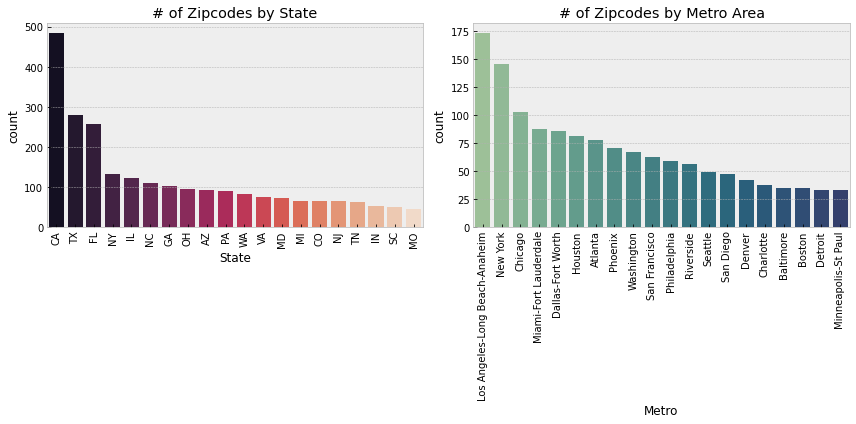

In [29]:
# plot the top 20 values of the 20% quantile of urbanized zipcodes
fig, (ax1, ax2) = plt.subplots(1,2, figsize =(12,6))
sns.countplot(urbanized_top20.State, order=pd.value_counts(urbanized_top20.State).iloc[:20].index, palette='rocket', ax=ax1)
sns.countplot(urbanized_top20.Metro, order=pd.value_counts(urbanized_top20.Metro).iloc[:20].index, palette='crest', ax=ax2)
ax1.title.set_text('# of Zipcodes by State')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.title.set_text('# of Zipcodes by Metro Area')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
fig.tight_layout()

In [30]:
# examine the number of zipcodes in the New York Metro area
urbanized_top20[urbanized_top20.Metro == "New York"]['State'].value_counts()

NY    96
NJ    49
Name: State, dtype: int64

> **Observations**: Within the top 20% of urbanized areas, states like California and Texas have the most zipcodes that fit this criteria. Addtionallty, the LA/Long Beach/Anaheim and New York metro areas have the most number of zipcodes. Notably, the New York metro area has more zipcodes than the state of New York, which is due to some zipcodes being in New Jersey.

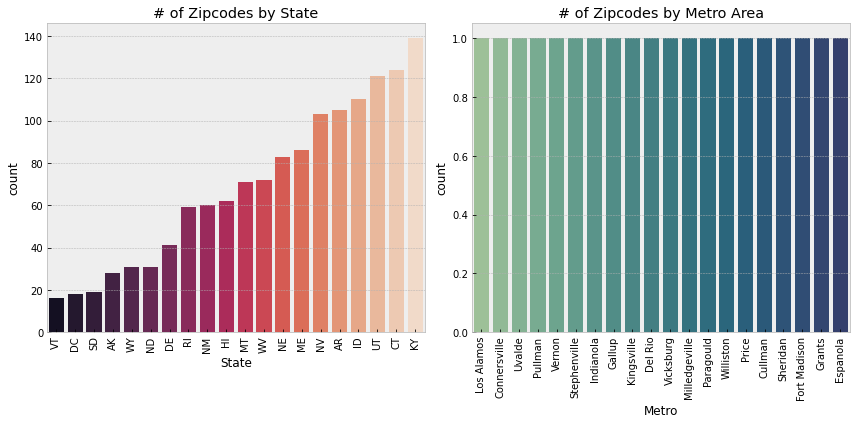

In [31]:
# plot the bottom 20 metro areas
fig, (ax1, ax2) = plt.subplots(1,2, figsize =(12,6))
sns.countplot(zipcode_data.State, order=pd.value_counts(zipcode_data.State, ascending=True).iloc[:20].index, palette='rocket', ax=ax1)
sns.countplot(zipcode_data.Metro, order=pd.value_counts(zipcode_data.Metro, ascending=True).iloc[:20].index, palette='crest', ax=ax2)
ax1.title.set_text('# of Zipcodes by State')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.title.set_text('# of Zipcodes by Metro Area')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
fig.tight_layout()

> **Observations**: The states with the fewest zipcodes represented in the dataset are the more rural areas, like Vermont, South Dakota, and Alaska. Also, the metro areas that have only one zipcode represented in the data are smaller areas that are not as informally well known.

### 2. Maximize low mortgage rates (no jumbo loans)

The second condition of the firm specifies a desire to maximize the current low mortgage rate environment. In other words, the firm wants to borrow as much as possible to finance these deals. As most lenders will require 20% down on investment properties, the firm will be able to borrow 80% of the purchase price for each property. 

However, as the firm does not want jumbo loans, this introduces some restrictions on the available properties to purchase as there are "maximum conforming loan limits" to consider. Basically, there is a maximum amount of money the firm will be able to borrow for a conventional mortgage before the loan must qualify as a jumbo loan. As of 2021, the conforming loan limit stands at $548,250 per property.

Also, worth noting is that certain zipcodes have higher exceptions to the national limit and lenders usually have a minimum loan amount (on average, $50,000 per property).

These considerations must be incorporated as well.

In [32]:
# maximum conforming loan limit exceptions for 2021
# source: https://www.ally.com/do-it-right/home/jumbo-loan-limits/
states = ['CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CO', 'CO', 'CO', 'CO', 'CO', 'CO', 'CO', 'CO', 'CO', 'CO', 'CO', 'CO', 'CO', 'CO', 'CO', 'CO', 'CO', 'CO', 'CT', 'FL', 'GU', 'HI', 'HI', 'HI', 'HI', 'HI', 'ID', 'ID', 'ID', 'ID', 'MD', 'MD', 'MD', 'MD', 'MD', 'MA', 'MA', 'MA', 'MA', 'MA', 'MA', 'MA', 'NH', 'NH', 'NJ', 'NJ', 'NJ', 'NJ', 'NJ', 'NJ', 'NJ', 'NJ', 'NJ', 'NJ', 'NJ', 'NJ', 'NY', 'NY', 'NY', 'NY', 'NY', 'NY', 'NY', 'NY', 'NY', 'NY', 'NY', 'NY', 'NC', 'NC', 'NC', 'PA', 'TN', 'TN', 'TN', 'TN', 'TN', 'TN', 'TN', 'TN', 'TN', 'TN', 'TN', 'TN', 'TN', 'VI', 'VI', 'VI', 'UT', 'UT', 'UT', 'UT', 'UT', 'UT', 'UT', 'UT', 'VA', 'VA', 'VA', 'VA', 'VA', 'VA', 'VA', 'VA', 'VA', 'VA', 'VA', 'VA', 'VA', 'VA', 'VA', 'VA', 'VA', 'VA', 'WA', 'WA', 'WA', 'DC', 'WV', 'WY']
counties = ['Solano', 'El Dorado', 'Placer', 'Sacramento', 'Yolo', 'Santa Barbara', 'San Luis Obispo', 'Sonoma', 'Monterey', 'Ventura', 'San Diego', 'Napa', 'Alameda', 'Contra Costa', 'Los Angeles', 'Marin', 'Orange', 'San Benito', 'San Francisco', 'San Mateo', 'Santa Clara', 'Santa Cruz', 'Adams', 'Arapahoe', 'Broomfield', 'Clear Creek', 'Denver', 'Douglas', 'Elbert', 'Gilpin', 'Jefferson', 'Park', 'Lake', 'San Miguel', 'Boulder', 'Routt', 'Garfield', 'Pitkin', 'Eagle', 'Summit', 'Fairfield', 'Monroe', 'Guam', 'Hawaii', 'Honolulu', 'Kalawao', 'Kauai', 'Maui', 'Blaine', 'Camas', 'Lincoln', 'Teton', 'Calvert', 'Charles', 'Frederick', 'Montgomery', 'Prince George\'s', 'Essex', 'Middlesex', 'Norfolk', 'Plymouth', 'Suffolk', 'Dukes', 'Nantucket', 'Rockingham', 'Strafford', 'Bergen', 'Essex', 'Hudson', 'Hunterdon', 'Middlesex', 'Monmouth', 'Morris', 'Ocean', 'Passaic', 'Somerset', 'Sussex', 'Union', 'Dutchess', 'Orange', 'Bronx', 'Kings', 'Nassau', 'New York', 'Putnam', 'Queens', 'Richmond', 'Rockland', 'Suffolk', 'Westchester', 'Camden', 'Pasquotank', 'Perquimans', 'Pike', 'Cannon', 'Cheatham', 'Davidson', 'Dickson', 'Macon', 'Maury', 'Robertson', 'Rutherford', 'Smith', 'Sumner', 'Trousdale', 'Williamson', 'Wilson', 'St. Croix Island', 'St. John Island', 'St. Thomas Island', 'Salt Lake', 'Tooele', 'Box Elder', 'Davis', 'Morgan', 'Weber', 'Summit', 'Wasatch', 'Alexandria City', 'Arlington', 'Clarke', 'Culpeper', 'Fairfax City', 'Fairfax', 'Falls Church City', 'Fauquier', 'Fredericksburg City', 'Loudoun', 'Madison', 'Manassas City', 'Manassas Park City', 'Prince William', 'Rappahannock', 'Spotsylvania', 'Stafford', 'Warren', 'King', 'Pierce', 'Snohomish', 'District of Columbia', 'Jefferson', 'Fairfield']
limits = [550850, 598000, 598000, 598000, 598000, 660100, 701500, 707250, 739450, 739450, 753250, 816500, 822375, 822375, 822375, 822375, 822375, 822375, 822375, 822375, 822375, 822375, 596850, 596850, 596850, 596850, 596850, 596850, 596850, 596850, 596850, 596850, 625500, 649750, 654350, 678500, 765600, 765600, 822250, 822235, 601450, 608350, 822375, 822375, 822375, 822375, 822375, 822375, 625500, 625500, 625500, 822375, 822375, 822375, 822375, 822375, 822375, 724500, 724500, 724500, 724500, 724500, 822375, 822375, 724500, 724500, 822375, 822375, 822375, 822375, 822375, 822375, 822375, 822375, 822375, 822375, 822375, 822375, 726525, 726525, 822375, 822375, 822375, 822375, 822375, 822375, 822375, 822375, 822375, 822375, 625500, 625500, 625500, 822375, 586500, 586500, 586500, 586500, 586500, 586500, 586500, 586500, 586500, 586500, 586500, 586500, 586500, 822375, 822375, 822375, 600300, 600300, 646300, 646300, 646300, 646300, 817650, 817650, 822375, 822375, 822375, 822375, 822375, 822375, 822375, 822375, 822375, 822375, 822375, 822375, 822375, 822375, 822375, 822375, 822375, 822375, 776250, 776250, 776250, 822375, 822375, 822375]

# create a DataFrame from the data
conforming_limits = {'State': states,
                     'County': counties,
                     'limit': limits}
loan_limits = pd.DataFrame(conforming_limits)

In [33]:
# as a start, set default max loan limit for all zipcodes
urbanized_top20['loan_limit'] = 548250

# update zipcodes with higher loan limits from the `loan_limits` DataFrame above
for index, row in urbanized_top20.iterrows():
    for index2, row2 in loan_limits.iterrows():
        if row['State'] == 'AK': # all zipcodes in Alaska have a higher loan limit
            urbanized_top20.loc[index, 'loan_limit'] = 822375
        elif (row['CountyName'] == row2['County']) & (row['State'] == row2['State']):
            urbanized_top20.loc[index, 'loan_limit'] = row2['limit']

In [34]:
# view the results of the above analysis
urbanized_top20

RegionID  RegionName           City State  \
0        84654       60657        Chicago    IL   
1        90668       75070       McKinney    TX   
2        91982       77494           Katy    TX   
3        84616       60614        Chicago    IL   
4        93144       79936        El Paso    TX   
...        ...         ...            ...   ...   
2940     63948       15217     Pittsburgh    PA   
2941     85350       62226     Belleville    IL   
2942     96373       91350  Santa Clarita    CA   
2943     84353       60098      Woodstock    IL   
2944     92308       78212    San Antonio    TX   

                               Metro   CountyName  SizeRank   1996-04  \
0                            Chicago         Cook         1  334200.0   
1                  Dallas-Fort Worth       Collin         2  235700.0   
2                            Houston       Harris         3  210400.0   
3                            Chicago         Cook         4  498100.0   
4                            El Paso      El Paso         5   77300.0   
...                              ...          ...       ...       ...   
2940                      Pittsburgh    Allegheny      2941  105400.0   
2941                       St. Louis  Saint Clair      2942   57800.0   
2942  Los Angeles-Long Beach-Anaheim  Los Angeles      2943  192600.0   
2943                         Chicago      McHenry      2944  151000.0   
2944                     San Antonio        Bexar      2945   79500.0   

       1996-05   1996-06  ...  2017-08  2017-09  2017-10  2017-11  2017-12  \
0     335400.0  336500.0  ...  1007500  1007800  1009600  1013300  1018700   
1     236900.0  236700.0  ...   310000   312500   314100   315000   316600   
2     212200.0  212200.0  ...   320600   320200   320400   320800   321200   
3     500900.0  503100.0  ...  1287700  1287400  1291500  1296600  1299000   
4      77300.0   77300.0  ...   119400   120000   120300   120300   120300   
...        ...       ...  ...      ...      ...      ...      ...      ...   
2940  105600.0  105800.0  ...   304700   305600   305900   304100   303400   
2941   58600.0   59300.0  ...    94900    97000    98500    99100    98900   
2942  192200.0  191700.0  ...   549800   555700   560400   564300   568600   
2943  150800.0  150400.0  ...   180300   181200   182200   183800   185200   
2944   79800.0   80100.0  ...   204500   204300   206300   211100   217200   

      2018-01  2018-02  2018-03  2018-04  loan_limit  
0     1024400  1030700  1033800  1030600      548250  
1      318100   319600   321100   321800      548250  
2      321200   323000   326900   329900      548250  
3     1302700  1306400  1308500  1307000      548250  
4      120300   120500   121000   121500      548250  
...       ...      ...      ...      ...         ...  
2940   304900   307800   311700   314000      548250  
2941    98700    99500   100900   101900      548250  
2942   573100   576000   577700   578100      822375  
2943   186400   188500   191800   194200      548250  
2944   222300   225800   228100   229100      548250  

[2945 rows x 273 columns]

In [35]:
# create a new column to record results
urbanized_top20['possible_loan'] = 'TBD'

def viable_loan(price, limit):
    '''
    Function to calculate whether the desired loan value is within the loan limits for that zipcode
    
    Args:
        price (integer): value of the property
        limit (integer): max loan limit for zipcode
        
    Returns:
        updates column `possible_loan` value as to feasibility of loan
    '''
    
    # the firm will try to negotiate purchase prices, so a 3% reduction from current prices will be incorporated
    discount = 0.03
    discounted_value = price - (discount*price)
    
    # calculate the size of the loan and max loan limit
    loansize = 0.80*discounted_value
    maxborrow = limit
    
    if loansize > 50000: # minimum mortgage loans that lenders require is ~$50,000
        if loansize < maxborrow:
            return 'feasible' 
        else: 
            return 'reject'
    else:
        return 'reject'

In [36]:
# run the function `viable_loan` for each zipcode 
urbanized_top20['possible_loan'] = urbanized_top20.apply(lambda x: viable_loan(x['2018-04'],x['loan_limit']), axis=1)

# filter out the data to display on feasible zipcodes
urbanized_top20 = urbanized_top20[urbanized_top20['possible_loan'] == 'feasible']
urbanized_top20

RegionID  RegionName           City State  \
1        90668       75070       McKinney    TX   
2        91982       77494           Katy    TX   
4        93144       79936        El Paso    TX   
5        91733       77084        Houston    TX   
6        61807       10467       New York    NY   
...        ...         ...            ...   ...   
2940     63948       15217     Pittsburgh    PA   
2941     85350       62226     Belleville    IL   
2942     96373       91350  Santa Clarita    CA   
2943     84353       60098      Woodstock    IL   
2944     92308       78212    San Antonio    TX   

                               Metro   CountyName  SizeRank   1996-04  \
1                  Dallas-Fort Worth       Collin         2  235700.0   
2                            Houston       Harris         3  210400.0   
4                            El Paso      El Paso         5   77300.0   
5                            Houston       Harris         6   95000.0   
6                           New York        Bronx         7  152900.0   
...                              ...          ...       ...       ...   
2940                      Pittsburgh    Allegheny      2941  105400.0   
2941                       St. Louis  Saint Clair      2942   57800.0   
2942  Los Angeles-Long Beach-Anaheim  Los Angeles      2943  192600.0   
2943                         Chicago      McHenry      2944  151000.0   
2944                     San Antonio        Bexar      2945   79500.0   

       1996-05   1996-06  ...  2017-09  2017-10  2017-11  2017-12  2018-01  \
1     236900.0  236700.0  ...   312500   314100   315000   316600   318100   
2     212200.0  212200.0  ...   320200   320400   320800   321200   321200   
4      77300.0   77300.0  ...   120000   120300   120300   120300   120300   
5      95200.0   95400.0  ...   160200   161900   162800   162800   162800   
6     152700.0  152600.0  ...   407300   411600   413200   414300   413900   
...        ...       ...  ...      ...      ...      ...      ...      ...   
2940  105600.0  105800.0  ...   305600   305900   304100   303400   304900   
2941   58600.0   59300.0  ...    97000    98500    99100    98900    98700   
2942  192200.0  191700.0  ...   555700   560400   564300   568600   573100   
2943  150800.0  150400.0  ...   181200   182200   183800   185200   186400   
2944   79800.0   80100.0  ...   204300   206300   211100   217200   222300   

      2018-02  2018-03  2018-04  loan_limit  possible_loan  
1      319600   321100   321800      548250       feasible  
2      323000   326900   329900      548250       feasible  
4      120500   121000   121500      548250       feasible  
5      162900   163500   164300      548250       feasible  
6      411400   413200   417900      822375       feasible  
...       ...      ...      ...         ...            ...  
2940   307800   311700   314000      548250       feasible  
2941    99500   100900   101900      548250       feasible  
2942   576000   577700   578100      822375       feasible  
2943   188500   191800   194200      548250       feasible  
2944   225800   228100   229100      548250       feasible  

[2775 rows x 274 columns]

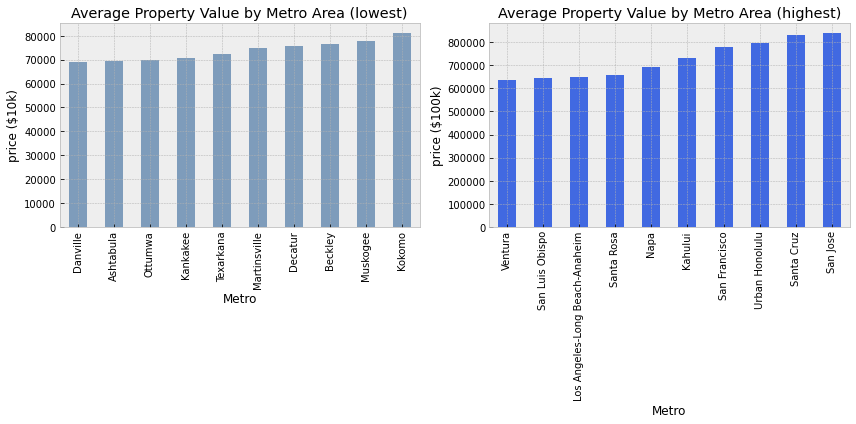

In [37]:
# Plot the average property value by Metro area (highest and lowest)
avg_metro_value_low = urbanized_top20.groupby('Metro')['2018-04'].mean().sort_values()[:10]
avg_metro_value_high = urbanized_top20.groupby('Metro')['2018-04'].mean().sort_values(ascending=False)[:10].sort_values()

fig, (ax1, ax2) = plt.subplots(1,2, figsize =(12,6))
avg_metro_value_low.plot.bar(ax=ax1, color=(0.2, 0.4, 0.6, 0.6))
avg_metro_value_high.plot.bar(ax=ax2, color=['royalblue'])
ax1.title.set_text('Average Property Value by Metro Area (lowest)')
ax1.set_ylabel("price ($10k)")
ax2.title.set_text('Average Property Value by Metro Area (highest)')
ax2.set_ylabel("price ($100k)")
fig.tight_layout()

In [38]:
# examine the states of the Metro areas with the lowest average property values
urbanized_top20.groupby(['Metro', 'State'])['2018-04'].mean().sort_values()[:10]

Metro         State
Danville      VA       68800.0
Ashtabula     OH       69300.0
Ottumwa       IA       69700.0
Kankakee      IL       70800.0
Texarkana     TX       72400.0
Marion        OH       72600.0
Martinsville  VA       75000.0
Decatur       IL       75500.0
Beckley       WV       76600.0
Muskogee      OK       78000.0
Name: 2018-04, dtype: float64

> **Observations:** A lot of California Metro areas top the list in having the highest average property value, while the lowest average property values are spread out across states like Ohio, Iowa, Illinois, and Texas.

### 3. Stable markets without huge price fluctuations

The firm wants to invest in zipcodes that do not experience huge price fluctuations. As real estate markets are historically cyclical, the highest fluctuations have usually occurred in coastal markets. To technically analyze this trend, the 'coefficient of variability' (CV) will be examined. The CV measure is the ratio of the standard deviation to the mean and is useful in comparing the degree of variation from one data series to another. Simply put, the lower the CV ratio, the lower the volatility in the data.

In [39]:
# drop zipcodes that don't have at least 15 years of data
years = len(urbanized_top20.loc[:, '1996-04':'2018-04'].columns) - 180  # 180 months = 10 years

urbanized_top20.drop(urbanized_top20[urbanized_top20.isna().sum(axis=1) >= years].index, inplace = True)

In [40]:
# calculate coefficient of variability
urbanized_top20['std'] = urbanized_top20.loc[:, '1996-04':'2018-04'].std(skipna=True, axis=1).round(decimals=2)
urbanized_top20['mean'] = urbanized_top20.loc[:, '1996-04':'2018-04'].mean(skipna=True, axis=1).round(decimals=2)
urbanized_top20['cv'] = (urbanized_top20['std']/urbanized_top20['mean']).round(decimals=4)

 Average CV ratio of top 20 urbanized zipcodes: 0.22
 Average CV ratio of bottom 20 urbanized zipcodes: 0.211


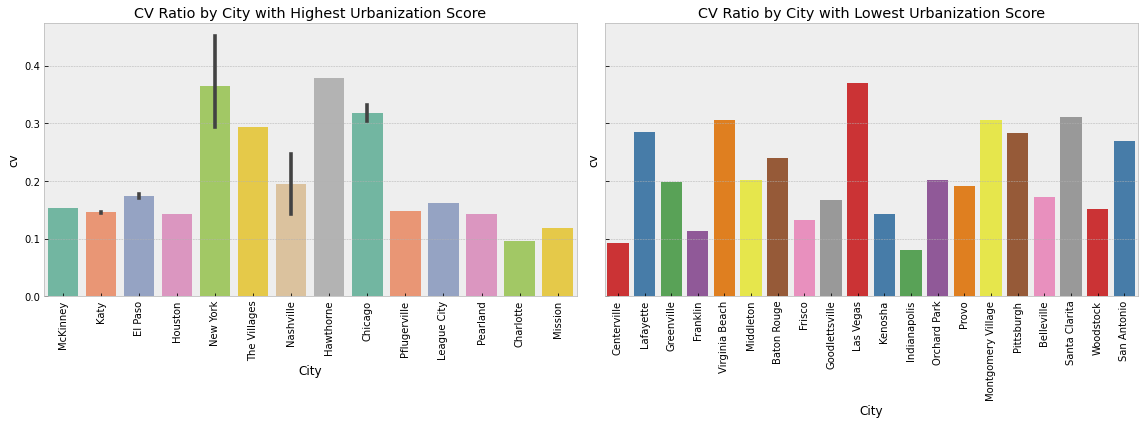

In [41]:
# plot the cities with the highest/lowest urbanization score and corresponding CV ratio
urban_top_20 = urbanized_top20[['City', 'SizeRank', 'cv']].sort_values(by='SizeRank')[:20]
urban_bottom_20 = urbanized_top20[['City', 'SizeRank', 'cv']].sort_values(by='SizeRank')[-20:]

print(f' Average CV ratio of top 20 urbanized zipcodes: {round(urban_top_20["cv"].mean(),3)}')
print(f' Average CV ratio of bottom 20 urbanized zipcodes: {round(urban_bottom_20["cv"].mean(),3)}')

fig, (ax1,ax2) = plt.subplots(1,2, figsize =(16,6), sharey=True)
ax1 = sns.barplot(x=urban_top_20.City, y=urban_top_20.cv, palette=("Set2"), ax=ax1)
ax2 = sns.barplot(x=urban_bottom_20.City, y=urban_bottom_20.cv, palette=("Set1"), ax=ax2)
ax1.title.set_text('CV Ratio by City with Highest Urbanization Score')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.title.set_text('CV Ratio by City with Lowest Urbanization Score')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
fig.tight_layout()

> **Observations**: Having previously examined the data on a Metro level, the plots above focus on the city level. It does not seem like the urbanization score (`SizeRank`) has a noticable impact on the CV ratio. In other words, the more metropolitan areas do not seem to have higher or lower price fluctuations than lower ranked metropolitan areas.

### 4. No significant appreciation in last 2 years

Lastly, the firm wants to avoid any zipcodes whose average prices have significantly appreciated over the last 2 years, as they feel any potential investment ROI is considerably reduced.

In [42]:
# calculate appreciation from 04/2016 to 04/2018
baseline = urbanized_top20['2016-04']
last_year = urbanized_top20['2018-04']
urbanized_top20['appreciation'] = (last_year - baseline)/baseline

In [43]:
# select zipcodes that have only experienced positive appreciation 
urbanized_top20 = urbanized_top20[urbanized_top20['appreciation']>0]

Average appreciation over 2 years of cities with highest CV ratio: 0.2589
Average appreciation over 2 years of cities with lowest CV ratio: 0.1298


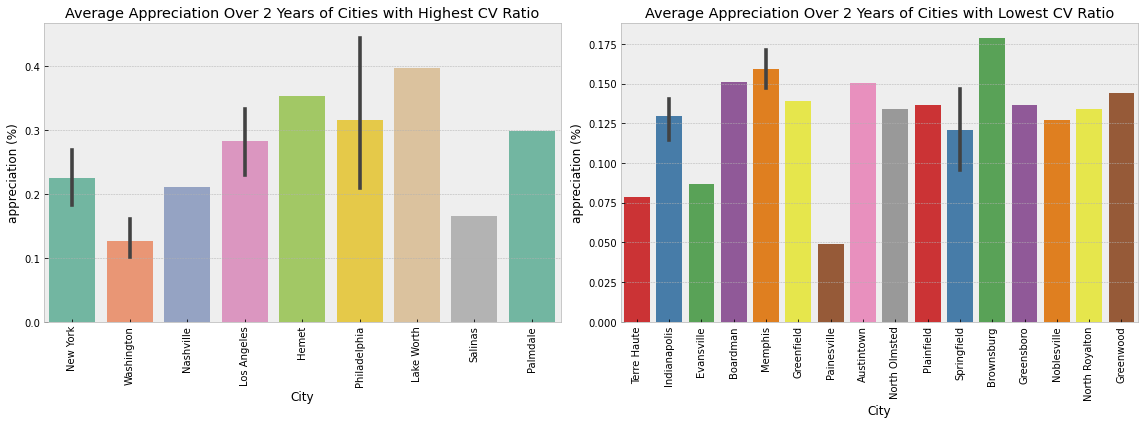

In [44]:
# plot the average appreciation over two years of cities with highest/lowest cv ratio
highest_cv = pd.DataFrame(urbanized_top20.groupby(['City', 'appreciation']).cv.mean().sort_values(ascending=False)[:20])
highest_cv.reset_index(inplace=True)
lowest_cv = pd.DataFrame(urbanized_top20.groupby(['City', 'appreciation']).cv.mean().sort_values()[:20])
lowest_cv.reset_index(inplace=True)

print(f'Average appreciation over 2 years of cities with highest CV ratio: {round(highest_cv["appreciation"].mean(),4)}')
print(f'Average appreciation over 2 years of cities with lowest CV ratio: {round(lowest_cv["appreciation"].mean(),4)}')

fig, (ax1,ax2) = plt.subplots(1,2, figsize =(16,6))
sns.barplot(x=highest_cv.City, y=highest_cv.appreciation, palette=("Set2"), ax=ax1)
sns.barplot(x=lowest_cv.City, y=lowest_cv.appreciation, palette=("Set1"), ax=ax2)
ax1.title.set_text('Average Appreciation Over 2 Years of Cities with Highest CV Ratio')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_ylabel('appreciation (%)')
ax2.title.set_text('Average Appreciation Over 2 Years of Cities with Lowest CV Ratio')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_ylabel('appreciation (%)')
fig.tight_layout()

> **Observations:** Examining the past 2 years of zipcode appreciation rates shows that cities with the highest CV ratios experienced an average appreciation over double that of cities with the lowest CV ratio. In other words, the CV ratio is a good indicator of zipcodes that have experienced higher appreciation. To further filter the data, the top 20% of zipcodes with the lowest CV ratio will be used to filter out zipcodes that have experienced significant appreciation.

In [45]:
# set a variable equal to top 20% quantile and return the filtered dataframe
cv_q = 0.20
cv_top20 = urbanized_top20[urbanized_top20['cv'] < urbanized_top20.cv.quantile(cv_q)]

In [46]:
# calculate the average appreciation over two years of cities with highest/lowest cv ratio
highest_cv = pd.DataFrame(cv_top20.groupby(['City', 'appreciation']).cv.mean().sort_values(ascending=False)[:5])
highest_cv.reset_index(inplace=True)
lowest_cv = pd.DataFrame(cv_top20.groupby(['City', 'appreciation']).cv.mean().sort_values()[:5])
lowest_cv.reset_index(inplace=True)

print(f'Average appreciation over 2 years of cities with highest CV ratio: {round(highest_cv["appreciation"].mean(),3)}')
print(f'Average appreciation over 2 years of cities with lowest CV ratio: {round(lowest_cv["appreciation"].mean(),3)}\n')

# calculate the average CV ratio over two years of cities with highest/lowest appreciation
largest_appreciation = pd.DataFrame(cv_top20.groupby(['City', 'cv']).appreciation.mean().sort_values(ascending=False)[:5])
largest_appreciation.reset_index(inplace=True)
smallest_appreciation = pd.DataFrame(cv_top20.groupby(['City', 'cv']).appreciation.mean().sort_values()[:5])
smallest_appreciation.reset_index(inplace=True)

print(f'Average CV ratio over 2 years of cities with highest appreciation: {round(largest_appreciation["cv"].mean(),3)}')
print(f'Average CV ratio over 2 years of cities with lowest appreciation: {round(smallest_appreciation["cv"].mean(),3)}')

Average appreciation over 2 years of cities with highest CV ratio: 0.153
Average appreciation over 2 years of cities with lowest CV ratio: 0.116

Average CV ratio over 2 years of cities with highest appreciation: 0.145
Average CV ratio over 2 years of cities with lowest appreciation: 0.121


> **Observations:** Looking at the relationship between the CV ratio and appreciation over the last 2 years shows there is no significant difference between the extremes of the remaining dataset, after having removed 80% of the data with the highest past appreciation. For CV ratios, between the top 5 and bottom 5 zipcodes, the average appreciation was only ~3.7% different. <br><br> Alternatively, for the top/bottom 5 of zipcodes sorted by appreciation, the average CV ratio difference was 0.024. Rather than arbitrarily sorting the data by appreciation or CV ratio and selecting the top 10, there is rationale to selecting the top 5 and bottom 5 zipcodes, as zipcodes currently experiencing a degree of appreciation may continue to do so into the future.

### 5. Top 10 recommended investment opportunities (appreciation vs CV ratio)

To recap: The final 10 zipcodes that will be used to forecast returns are chosen based on a filtered list of the top 20% of zipcodes with lowest CV ratios. At this point, there is no correct method to further narrow down the data to analyze. Therefore, the data will be sorted by appreciation and also by the CV ratio.

The time series modeling and subsequent forecasting will be done on the top 5 and bottom 5 zipcodes of each sorting option (appreciation and CV ratio).

In [47]:
# sort data by appreciation values and return top 5 values and bottom 5 values
investment_df_top_5_app = cv_top20.sort_values('appreciation', ascending=False)[:5]
investment_df_bottom_5_app = cv_top20.sort_values('appreciation')[:5]
investment_df_app = pd.concat([investment_df_top_5_app, investment_df_bottom_5_app])
investment_df_app.reset_index(drop=True, inplace=True)
investment_df_app

RegionID  RegionName         City State        Metro  CountyName  SizeRank  \
0     76576       43207     Columbus    OH     Columbus    Franklin       849   
1     76592       43224     Columbus    OH     Columbus    Franklin       975   
2     70590       29605   Greenville    SC   Greenville  Greenville      2107   
3     76581       43213    Whitehall    OH     Columbus    Franklin      1666   
4     70592       29607   Greenville    SC   Greenville  Greenville       805   
5     91470       76549      Killeen    TX      Killeen        Bell       856   
6     91982       77494         Katy    TX      Houston      Harris         3   
7     91463       76542      Killeen    TX      Killeen        Bell       978   
8     85103       61704  Bloomington    IL  Bloomington      McLean      1746   
9     85101       61701  Bloomington    IL  Bloomington      McLean      1544   

    1996-04   1996-05   1996-06  ...  2018-01  2018-02  2018-03  2018-04  \
0   61900.0   61900.0   62100.0  ...    95800    97000    97600    98200   
1   66000.0   66100.0   66200.0  ...    96600    97100    97500    98100   
2   77000.0   76100.0   75200.0  ...   146300   146900   147700   148400   
3   72300.0   72400.0   72400.0  ...   106700   107800   107400   106700   
4  113300.0  113700.0  114200.0  ...   209700   211800   215000   217400   
5   87700.0   87700.0   87700.0  ...   123700   123600   123700   123800   
6  210400.0  212200.0  212200.0  ...   321200   323000   326900   329900   
7   99200.0   99000.0   98900.0  ...   148300   148600   148700   148300   
8  151700.0  151700.0  151800.0  ...   204400   204700   203400   202100   
9   70500.0   70500.0   70600.0  ...   102500   102700   102500   102400   

   loan_limit  possible_loan       std       mean      cv  appreciation  
0      548250       feasible  10911.24   74607.55  0.1462      0.435673  
1      548250       feasible  11747.66   77013.58  0.1525      0.399429  
2      548250       feasible  13769.69   95129.06  0.1447      0.389513  
3      548250       feasible  11260.43   83174.72  0.1354      0.354061  
4      548250       feasible  20652.82  141866.04  0.1456      0.341975  
5      548250       feasible  13484.19  115120.75  0.1171      0.001618  
6      548250       feasible  37730.79  262110.57  0.1439      0.004262  
7      548250       feasible  16862.70  132726.42  0.1270      0.004743  
8      548250       feasible  18461.96  187017.36  0.0987      0.006474  
9      548250       feasible  11416.11   95363.77  0.1197      0.011858  

[10 rows x 278 columns]

In [48]:
# sort data by CV ratio and return top 5 values and bottom 5 values
investment_df_top_5_cv = cv_top20.sort_values('cv', ascending=False)[:5]
investment_df_bottom_5_cv = cv_top20.sort_values('cv')[:5]
investment_df_cv = pd.concat([investment_df_top_5_cv, investment_df_bottom_5_cv])
investment_df_cv.reset_index(drop=True, inplace=True)
investment_df_cv

RegionID  RegionName          City State         Metro   CountyName  \
0     93119       79907       El Paso    TX       El Paso      El Paso   
1     79781       49505  Grand Rapids    MI  Grand Rapids         Kent   
2     71168       30518        Buford    GA       Atlanta     Gwinnett   
3     79046       48187        Canton    MI       Detroit        Wayne   
4     78126       46383    Valparaiso    IN       Chicago       Porter   
5     78759       47802   Terre Haute    IN   Terre Haute         Vigo   
6     78065       46260  Indianapolis    IN  Indianapolis       Marion   
7     78734       47715    Evansville    IN    Evansville  Vanderburgh   
8     77216       44512      Boardman    OH    Youngstown     Mahoning   
9     74592       38018       Memphis    TN       Memphis       Shelby   

   SizeRank   1996-04   1996-05   1996-06  ...  2018-01  2018-02  2018-03  \
0      1136   58900.0   58800.0   58800.0  ...    93800    94000    94100   
1      2569   81100.0   81900.0   82600.0  ...   146600   148300   150000   
2      1117  121500.0  121900.0  122500.0  ...   233300   235500   237600   
3       660  153700.0  154500.0  155400.0  ...   253400   255200   257200   
4      1434  153300.0  151000.0  148700.0  ...   200100   201300   204200   
5      2285   93900.0   92900.0   91700.0  ...    99000    99700   100600   
6      1982  150700.0  149900.0  149000.0  ...   188300   189100   191200   
7      2345  102700.0  102700.0  102800.0  ...   135600   135500   136500   
8      1783   85800.0   86400.0   86900.0  ...   109900   110100   110700   
9      1949  129700.0  130200.0  130600.0  ...   170200   171500   172000   

   2018-04  loan_limit  possible_loan       std       mean      cv  \
0    93900      548250       feasible  11987.12   75435.09  0.1589   
1   151000      548250       feasible  16622.27  104600.38  0.1589   
2   239400      548250       feasible  27228.72  171513.96  0.1588   
3   258200      548250       feasible  31496.85  198468.68  0.1587   
4   207100      548250       feasible  25212.60  158949.06  0.1586   
5   101300      548250       feasible   4825.24   92352.83  0.0522   
6   193600      548250       feasible  10406.15  160336.60  0.0649   
7   137700      548250       feasible   8022.30  121158.49  0.0662   
8   111200      548250       feasible   7258.71   98071.70  0.0740   
9   172300      548250       feasible  11247.31  150560.75  0.0747   

   appreciation  
0      0.096963  
1      0.241776  
2      0.187500  
3      0.155774  
4      0.082593  
5      0.078807  
6      0.114565  
7      0.086819  
8      0.151139  
9      0.147137  

[10 rows x 278 columns]

> **Observations:** Having narrowed down the potential zipcodes for investment to 20 zipcodes, the next section will examine the future potential appreciation of these zipcodes to determine the best 5 zipcodes to invest in for future return.

In [49]:
# inital preprocessing to melt the dataframe
def melt_data(df, zipcode):
    '''
    Function to melt the DataFrame from wide format to long format
    
    Args:
        df (pandas dataframe): original time series with columns to be melted
        zipcode (integer): selected zipcode value for the data to be melted
        
    Returns:
        melted time series in long format, stripped of all other columns in initial time series
    '''
    melted = pd.melt(df, id_vars=['RegionID','RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank',
                                  'loan_limit', 'possible_loan', 'std', 'mean', 'cv', 
                                  'appreciation',], var_name='time', value_name=str(zipcode))
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=[str(zipcode)])
    melted_df = melted.groupby('time').aggregate({str(zipcode):'mean'})
    return melted_df

## Zipcodes Sorted By Appreciation Value

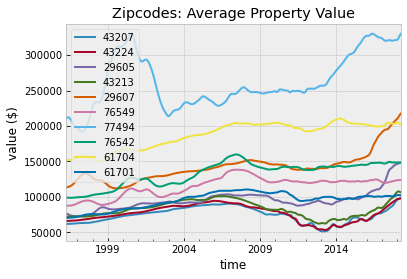

In [50]:
# melt each zipcode in `investment_df_app` dataframe and plot time series
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

for index, row in investment_df_app.iterrows():
    value = melt_data(investment_df_app.loc[[index]],row['RegionName'])
    value.plot(kind='line', ax=ax1)
    
plt.ylabel('value ($)')
plt.title('Zipcodes: Average Property Value')
plt.show();

> **Observations:** Plotting the top/bottom 5 zipcodes by appreciation shows a range of values from around 50,000 to over 300,000. Additionally, most zipcodes did see a degree of decrease in value in the housing crash of 2008 - 2012. Some zipcodes recovered from it and are near all-time highs like 29607 and 29605. Alternatively, zipcodes like 61701 and 76542 have yet to significantly come off of the decrease in prices.

## Zipcodes Sorted By CV Ratio

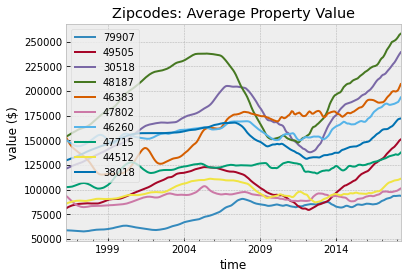

In [51]:
# melt each zipcode in `investment_df_cv` dataframe and plot time series
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

for index, row in investment_df_cv.iterrows():
    value = melt_data(investment_df_cv.loc[[index]],row['RegionName'])
    value.plot(kind='line', ax=ax1)
    
plt.ylabel('value ($)')
plt.title('Zipcodes: Average Property Value')
plt.show();

> **Observations:** Not unsurprisingly, the zipcodes with the highest CV ratios (79907, 49505, 30518) all experienced significant drops in subsequent years after 2008 housing crash, but recovered spectacularly from the lows. The zipcodes with the lowest CV ratios (44512, 38018) do seem to have been largely unaffected by the housing crash and have had rather steady price values over time.

## ARIMA Modeling

Having narrowed down the data to 10 investment opportunities, this section will examine each zipcode more in-depth.

### Functions

To start, multiple functions will be created to efficiently examine multiple zipcodes and create successful ARIMA models.

In [52]:
def zipcode_plots(df, zipcode):
    '''
    Function to show various plots of zipcode time series (line, boxplot, kde, heatmap)
    
    Args:
        df (pandas dataframe): melted time series
        zipcode (integer): selected zipcode value
        
    Returns:
        melted time series
    '''
    # plot the price history    
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize =(16,4))
    sns.lineplot(data=df, ax=ax1)
    sns.boxplot(data=df,palette="PRGn", ax=ax2)
    sns.kdeplot(data=df, ax=ax3)
    ax1.title.set_text('Average Value Over Time')
    ax2.title.set_text('Historical Price Distribution')
    ax3.title.set_text('Historical Price Density')
    fig.tight_layout()
    plt.show();
    
    # plot the heatmap of price appreciation/depreciation
    groups_monthly = df.groupby(pd.Grouper(freq='M'))
    months = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)
    months_df = pd.DataFrame(months)
    len_melted_df = len(df)
    months_df.columns = range(1,len_melted_df+1)
    plt.figure(figsize=(16,1))
    plt.matshow(months_df, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r, fignum=1)
    plt.xlabel('time period')
    plt.show();
    
    return df

def zipcode_visuals(df, zipcode):
    '''
    Aggregate function to melt data and plot various time series visualizations
    
    Args:
        df (pandas dataframe): melted time series
        zipcode (integer): selected zipcode value
        
    Returns:
        melted time series
    '''
    melted_df = melt_data(df, zipcode)
    plotted_df = zipcode_plots(melted_df, zipcode)

    return plotted_df

In [53]:
def rollingstats_DF_test(df, zipcode):
    '''
    Function for stationarity check of time series to output rolling stats and DF test results
    
    Args:
        df (pandas dataframe): melted time series
        zipcode (integer): selected zipcode value
        
    Returns:
        melted time series
    '''
    # Calculate rolling statistics
    roll_mean = df.rolling(window=12, center=False).mean()
    roll_std = df.rolling(window=12, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(df)
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(8,4))
    plt.plot(df, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title(f'Rolling Statistics: {zipcode}')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print(f'Results of Dickey-Fuller Test for {zipcode}: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(f'{dfoutput}\n')
    
    return df

def seasonality(df):
    '''
    Function to apply seasonal_decompose() to check for data seasonality
    
    Args:
        df (pandas dataframe): melted time series
        
    Returns:
        melted time series
    '''
    decomposition = seasonal_decompose(df, period=12)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(12,4))
    plt.subplot(221)
    plt.plot(df, label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(222)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(223)
    plt.plot(seasonal, label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.subplot(224)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show();
    
    return df

def stationarity_check(df, zipcode):
    '''
    Aggregate function to check for stationarity through rolling statistics, 
    Dickey-Fuller test, and seasonality
    
    Args:
        df (pandas dataframe): melted time series
        zipcode (integer): selected zipcode value
        
    Returns:
        None
    '''
    stationarity_checked_df =  rollingstats_DF_test(df, zipcode)
    seasonality_checked_df = seasonality(stationarity_checked_df)
    return None

In [54]:
def evaluate_arima_model(X, arima_order):
    '''
    Function to train sample ARIMA models and calculate MSE after predictions 
    
    Args:
        X (pandas dataframe): melted time series
        arima_order (tuple): parameters - (p,d,q) 
        
    Returns:
        mean squared error of trained ARIMA model
        
    source: https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/
    '''
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

def evaluate_models(dataset, p_values, d_values, q_values):
    '''
    Function to iterate through (p,d,q) combinations in `evaluate_arima_model` function
    
    Args:
        dataset (np.array): array of time series values
        p_values, d_values, q_values (list/range): values for parameter grid analysis 
        
    Returns:
        configuration of (p,d,q) values with lowest MSE
        
    adapted from: https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/
    '''
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    elapsed_time = 0
    count=1
    total_combos = len(p_values)*len(d_values)*len(q_values)
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                print(f'time elapsed: {round(elapsed_time/60,2)} mins. \t combination: {count} of {total_combos}') if count % 5 == 0 else None
                try:
                    global time                    
                    t0 = time.time()
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    # print('ARIMA%s MSE=%.3f' % (order,mse))
                    t1 = time.time()
                    timed = t1 - t0
                    count+=1    
                    elapsed_time+=timed
                except:
                    count+=1    
                    elapsed_time+=timed
                    continue

    print('\n Best ARIMA%s MSE=%.3f \n' % (best_cfg, best_score))
    return best_cfg

def arima_parameters(df):
    '''
    Function to define grid search of (p,d,q) values and execute `evaluate_models` function 
    
    Args:
        df (pandas dataframe): melted time series
        
    Returns:
        configuration of (p,d,q) values with lowest MSE
    '''
    # evaluate parameters
    print('evaluating best ARIMA parameters...\n')
    p_values = [0, 1, 2, 4, 6, 8, 10]
    d_values = range(0, 3)
    q_values = range(0, 3)
    
    
    best_cfg = evaluate_models(df.values, p_values, d_values, q_values)
    
    return best_cfg

def run_arima_model(df, config):
    '''
    Function to train ARIMA model of (p,d,q) with lowest MSE and fit time series to model
    
    Args:
        df (pandas dataframe): melted time series
        config (tuple): parameters - (p,d,q) 
        
    Returns:
        ARIMA model
    '''
    # create ARIMA model from best parameters with lowest MSE
    model = ARIMA(df, order=config)
    model_fit = model.fit(disp=0)
    print(model_fit.summary())
    
    return model_fit
    
def arima_visualizations(model, df):
    '''
    Function to plot residuals, density, and predicted values of ARIMA model
    
    Args:
        model (statsmodels arima_model): ARIMA model
        df (pandas dataframe): melted time series
        
    Returns:
        ARIMA model
    '''
    # create a dataframe with the ARIMA predicted time series values
    predictions_ARIMA = pd.Series(model.predict(typ='levels'), copy=True)
    
    # plot the ARIMA results and predicted values of original time series data
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize =(16,4))   
    residuals = pd.DataFrame(model.resid)
    residuals.plot(title="Residuals", ax=ax1)
    residuals.plot(kind='kde', title='Density', ax=ax2)
    predictions_ARIMA.plot(kind='line', color='b', label='ARIMA', ax=ax3)
    df.plot(kind='line', color='r', label='time_series', ax=ax3)
    plt.legend(loc='best')
    plt.show();
    
    return model

def arima_results(df):  
    '''
    Aggregate function to obtain lowest MSE parameters, train and fit ARIMA model, and plot results
    
    Args:
        df (pandas dataframe): melted time series
        
    Returns:
        ARIMA model
    '''    
    arima_params = arima_parameters(df)
    model_fit = run_arima_model(df, arima_params)
    arima_model = arima_visualizations(model_fit, df)
    return arima_model

In [55]:
def arima_forecast(df, timeseries, model, period, zipcode):
    '''
    Function to forecast prices (including 95% confidence interval) for given period length and plot data
    
    Args:
        df (pandas dataframe): original time series in wide format
        timeseries (pandas dataframe): melted time series
        model (statsmodels arima_model): ARIMA model
        period (integer): number of periods to create forecast
        zipcode (integer): selected zipcode value

    Returns:
        pandas dataframe with predictions
    '''         
    # determine forecast range
    start =  timeseries.index[-1]+relativedelta(months=+1)
    end =  timeseries.index[-1]+relativedelta(months=+period)
    
    # create a forecast with a 95% confidence interval 
    forecast, se, conf_int = model.forecast(period, alpha=0.05)
    
    # create dataframe to record forecast and confidence interval
    df_forecast = pd.DataFrame({'time': pd.date_range(start = start, end = end, freq = 'MS')})

    df_forecast['forecast'] = pd.Series(forecast, index=df_forecast.index)
    df_forecast['lower_bound'] = pd.Series(conf_int[:, 0], index=df_forecast.index)
    df_forecast['upper_bound'] = pd.Series(conf_int[:, 1], index=df_forecast.index)
    df_forecast.set_index('time', inplace = True)
    
    # combine the time series with forecast into one dataframe
    df_final = pd.concat([timeseries, df_forecast])
    
    # visualizations
    fig, (ax1) = plt.subplots(1,1, figsize =(16,4))  
    
    # plot the ARIMA model results against original time series and show forecast
    #  model.plot_predict(1,len(timeseries)+period, ax=ax1)
    
    # plot the original time series with forecast, including conf. interval
    df_final[f'{zipcode}'].plot(label = 'raw data', ax=ax1)
    df_final['forecast'].plot(label = 'forecast', ax=ax1)
    plt.fill_between(df_final.index, df_final['lower_bound'], df_final['upper_bound'], color="k", alpha=.15,
                    label = 'confidence interval')
    plt.legend(loc = 'best')
    plt.title(f'Forecast for {zipcode}')
    plt.show();
    
    # forecast the price for given period, including conf. interval
    forecast_2_years = df_final.loc[f'{end}', 'forecast']
    forecast_lower = df_final.loc[f'{end}', 'lower_bound']
    forecast_upper = df_final.loc[f'{end}', 'upper_bound']

    base_price = timeseries[f'{zipcode}'].iloc[-1]
    
    print(f'Forecast Period: {start.strftime("%m/%d/%Y")} to {end.strftime("%m/%d/%Y")}, {period} months')
    predicted_percent_change = (forecast_2_years - base_price) / base_price
    prediction = f'{np.round(predicted_percent_change * 100, 2)}%'

    best_percent_change = (forecast_upper - base_price) / base_price
    best_prediction = f'{np.round(best_percent_change * 100, 2)}%'

    worst_percent_change = (forecast_lower - base_price) / base_price
    worst_prediction = f'{np.round(worst_percent_change * 100, 2)}%'
    
    # calculate inital investment costs
    discount = 0.03        # potential 3% discount on purchase price (through negotiations)
    down_payment = 0.20    # down payment of 20%
    closing_costs = 0.04   # estimated closing costs at 4%
 
    price = df['2018-04']
    discounted_price = (1-discount) * price

    # create a new column with the estimated initial investment costs
    df['initial_investment'] = (down_payment * discounted_price) + (closing_costs*discounted_price)
    
    data = {f'{zipcode}':[f"{df.iloc[0]['City']}, {df.iloc[0]['State']}", '${:,.0f}'.format(df.iloc[0]['initial_investment']), prediction, best_prediction, worst_prediction]}

    prediction_df = pd.DataFrame(data, index=['city, state', 'initial investment', 'prediction', 'best case scenario', 'worst case scenario'])
    
    return prediction_df

### Displaying an ARIMA model analysis for one zipcode

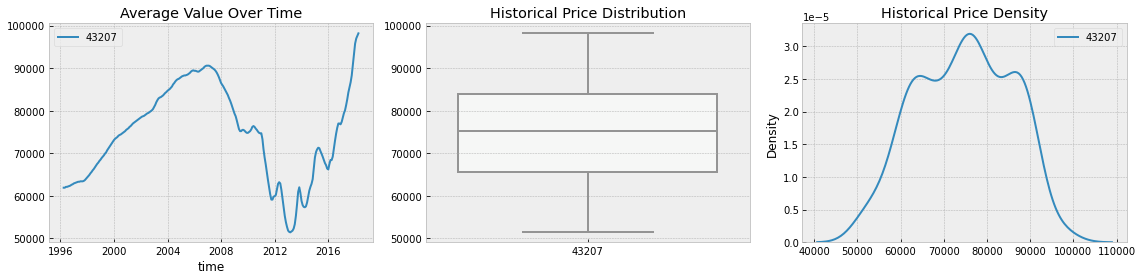

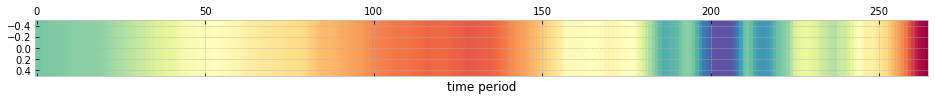

43207
time               
1996-04-01  61900.0
1996-05-01  61900.0
1996-06-01  62100.0
1996-07-01  62100.0
1996-08-01  62200.0
...             ...
2017-12-01  93600.0
2018-01-01  95800.0
2018-02-01  97000.0
2018-03-01  97600.0
2018-04-01  98200.0

[265 rows x 1 columns]

In [56]:
# select the first zipcode from the investment_df_app dataframe
zipcode_one = investment_df_app.copy()[0:1]
zipcode_num = 43207
# melt the data from wide format to long format and display plots
melted_df = zipcode_visuals(zipcode_one, zipcode_num)
melted_df

> **Observations:** The plots above provide different methods on visualizing price history. <br><br> This zipcode did experience a large decline in 2008-2012, but is at its all-time highs in price appreciation. The box-plot and density plots display the distribution of historical prices. The box-plot shows 50% of the historical prices have been between ~65,000 and ~85,000 ($\Delta$= 20,000). So the zipcode hasn't historically experienced the currently high price vale for any significant amount of time. <br><br> The heat map's spectrum (from blue to green to red) visually show how the price has changed over 22 years (265 periods). In other words, the darker red areas show when the zipcode experienced a higher price.

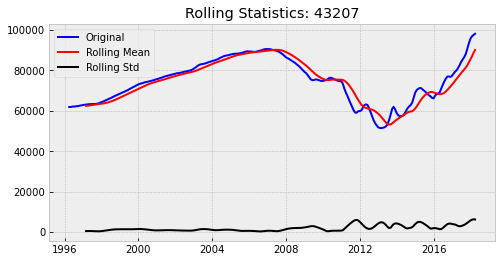

Results of Dickey-Fuller Test for 43207: 

Test Statistic                  -2.379606
p-value                          0.147575
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64



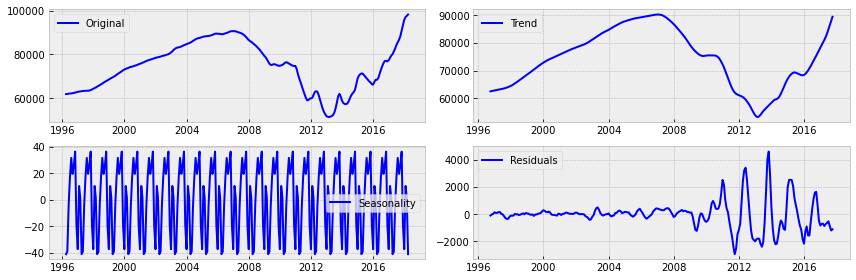

In [57]:
stationarity_check(melted_df,zipcode_num)

> **Observations:** Stationarity is when the data being examined has a constant mean, standard deviation, and covariance over time. Time series data requires stationarity to carry out accurate forecasts. Therefore, it is important to first check for stationarity before modeling the time series data. <br><br> The rolling standard deviation is pretty constant for the zipcodes, but the rolling mean does display a trend over time for all zipcodes. Furthermore, the results of the Dickey-Fuller Test show the null hypothesis that the data is non-stationary cannot be rejected. <br><br> Additionally, the time series does show a seasonal component, but given it's a small fluctuation  +/- \$40, we'll continue with just removing the trend that is present in the data.

evaluating best ARIMA parameters...

time elapsed: 0.1 mins. 	 combination: 5 of 63
time elapsed: 0.29 mins. 	 combination: 10 of 63
time elapsed: 0.65 mins. 	 combination: 15 of 63
time elapsed: 1.21 mins. 	 combination: 20 of 63
time elapsed: 1.92 mins. 	 combination: 25 of 63
time elapsed: 2.67 mins. 	 combination: 30 of 63
time elapsed: 3.59 mins. 	 combination: 35 of 63
time elapsed: 4.88 mins. 	 combination: 40 of 63
time elapsed: 6.73 mins. 	 combination: 45 of 63
time elapsed: 9.57 mins. 	 combination: 50 of 63
time elapsed: 15.93 mins. 	 combination: 55 of 63
time elapsed: 25.17 mins. 	 combination: 60 of 63

 Best ARIMA(1, 1, 2) MSE=270538.100 

                             ARIMA Model Results                              
Dep. Variable:                D.43207   No. Observations:                  264
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1889.104
Method:                       css-mle   S.D. of innovations            308.420
Date:               

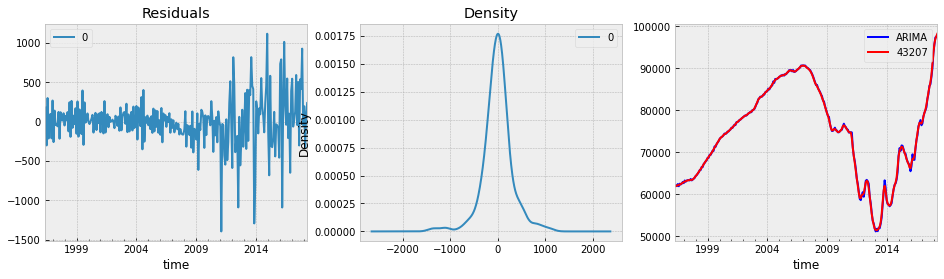

In [58]:
model = arima_results(melted_df)

> **Observations:** The ARIMA model will actually address the non-stationarity from the data and remove any trends from the time series. Cycling through different combinations, the best parameters turned out to be (1,1,2). Creating an ARIMA model from those parameters results in a model that is statistically significant. The residuals and distribution do hover around 0, specifying no trend in the data. The fitted values of the ARIMA model seem to align pretty well with the time series, signifying a good fit.

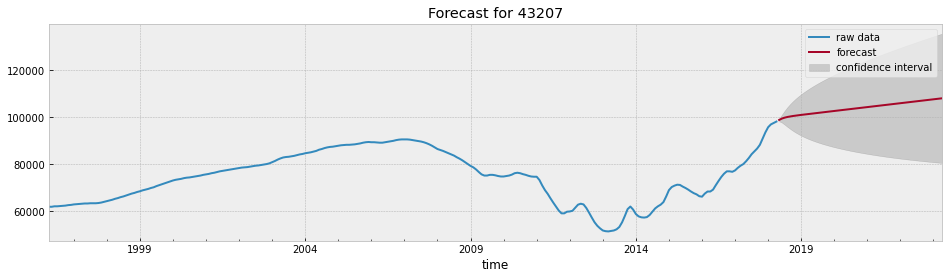

Forecast Period: 05/01/2018 to 04/01/2023, 60 months


43207
city, state          Columbus, OH
initial investment        $22,861
prediction                 10.08%
best case scenario          38.1%
worst case scenario       -17.94%

In [59]:
arima_forecast(zipcode_one, melted_df, model, 60, zipcode_num)

> **Observations:** There is a positive price appreciation (10.08%) forecasted for this zipcode over the next 5 years.

### Aggregate Analysis by Appreciation

Having analyzed one zipcode in detail, the zipcodes processing will be batched into one compacted easy-to-view results output.

----------Zipcode 43207: begin ----------


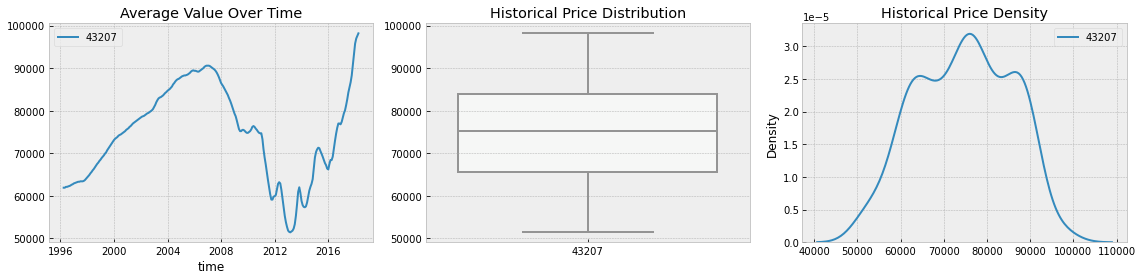

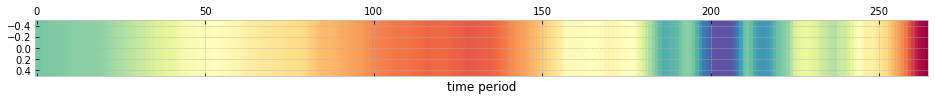

43207
time               
1996-04-01  61900.0
1996-05-01  61900.0
1996-06-01  62100.0
1996-07-01  62100.0
1996-08-01  62200.0
...             ...
2017-12-01  93600.0
2018-01-01  95800.0
2018-02-01  97000.0
2018-03-01  97600.0
2018-04-01  98200.0

[265 rows x 1 columns]

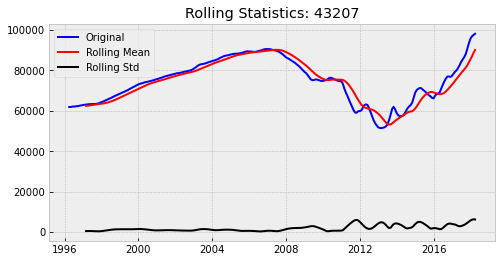

Results of Dickey-Fuller Test for 43207: 

Test Statistic                  -2.379606
p-value                          0.147575
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64



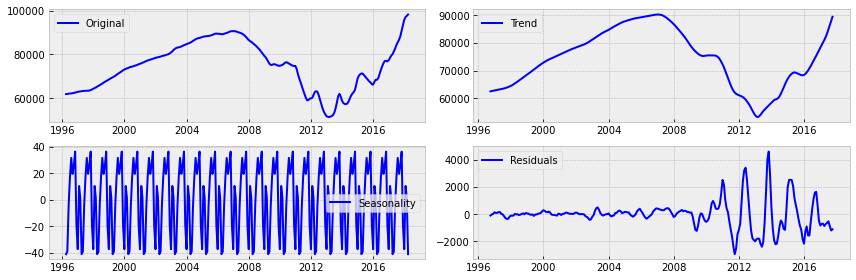

evaluating best ARIMA parameters...

time elapsed: 0.1 mins. 	 combination: 5 of 63
time elapsed: 0.29 mins. 	 combination: 10 of 63
time elapsed: 0.61 mins. 	 combination: 15 of 63
time elapsed: 1.17 mins. 	 combination: 20 of 63
time elapsed: 1.87 mins. 	 combination: 25 of 63
time elapsed: 2.64 mins. 	 combination: 30 of 63
time elapsed: 3.56 mins. 	 combination: 35 of 63
time elapsed: 4.91 mins. 	 combination: 40 of 63
time elapsed: 6.68 mins. 	 combination: 45 of 63
time elapsed: 9.45 mins. 	 combination: 50 of 63
time elapsed: 15.79 mins. 	 combination: 55 of 63
time elapsed: 24.71 mins. 	 combination: 60 of 63

 Best ARIMA(1, 1, 2) MSE=270538.100 

                             ARIMA Model Results                              
Dep. Variable:                D.43207   No. Observations:                  264
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1889.104
Method:                       css-mle   S.D. of innovations            308.420
Date:               

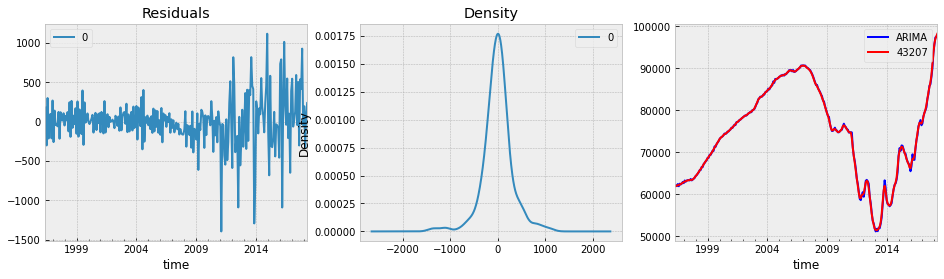

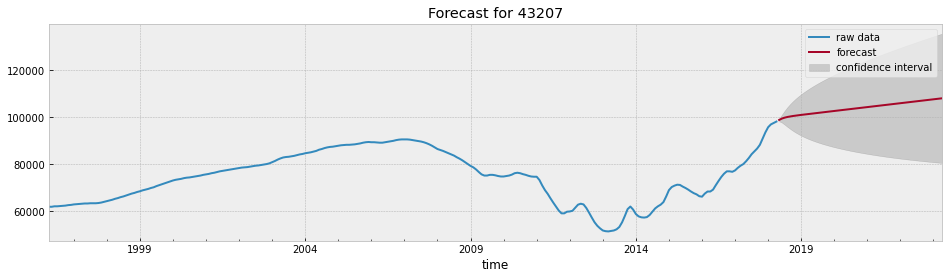

Forecast Period: 05/01/2018 to 04/01/2023, 60 months


43207
city, state          Columbus, OH
initial investment        $22,861
prediction                 10.08%
best case scenario          38.1%
worst case scenario       -17.94%

----------Zipcode 43207: end ----------

----------Zipcode 43224: begin ----------


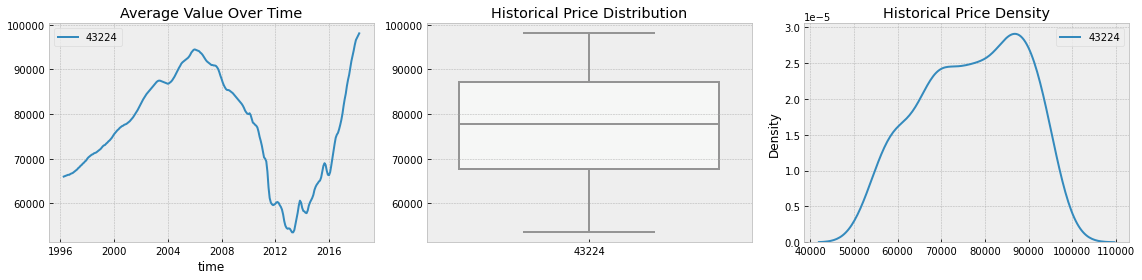

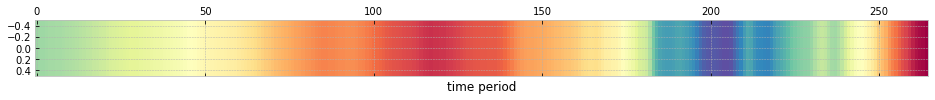

43224
time               
1996-04-01  66000.0
1996-05-01  66100.0
1996-06-01  66200.0
1996-07-01  66300.0
1996-08-01  66400.0
...             ...
2017-12-01  95500.0
2018-01-01  96600.0
2018-02-01  97100.0
2018-03-01  97500.0
2018-04-01  98100.0

[265 rows x 1 columns]

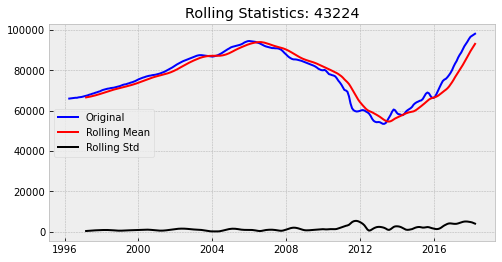

Results of Dickey-Fuller Test for 43224: 

Test Statistic                  -2.350835
p-value                          0.156096
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64



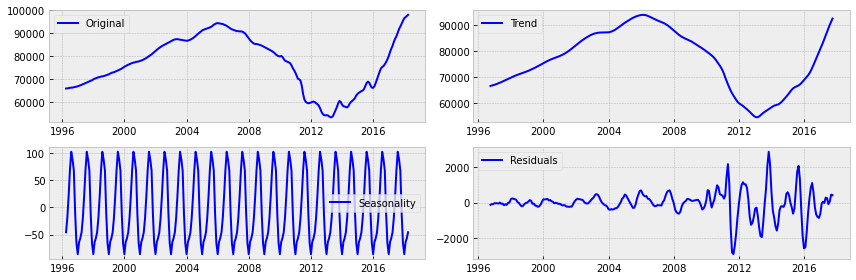

evaluating best ARIMA parameters...

time elapsed: 0.01 mins. 	 combination: 5 of 63
time elapsed: 0.2 mins. 	 combination: 10 of 63
time elapsed: 0.44 mins. 	 combination: 15 of 63
time elapsed: 0.82 mins. 	 combination: 20 of 63
time elapsed: 1.35 mins. 	 combination: 25 of 63
time elapsed: 1.75 mins. 	 combination: 30 of 63
time elapsed: 2.23 mins. 	 combination: 35 of 63
time elapsed: 3.38 mins. 	 combination: 40 of 63
time elapsed: 5.4 mins. 	 combination: 45 of 63
time elapsed: 9.28 mins. 	 combination: 50 of 63
time elapsed: 15.58 mins. 	 combination: 55 of 63
time elapsed: 26.34 mins. 	 combination: 60 of 63

 Best ARIMA(6, 1, 0) MSE=178401.210 

                             ARIMA Model Results                              
Dep. Variable:                D.43224   No. Observations:                  264
Model:                 ARIMA(6, 1, 0)   Log Likelihood               -1826.447
Method:                       css-mle   S.D. of innovations            243.151
Date:                

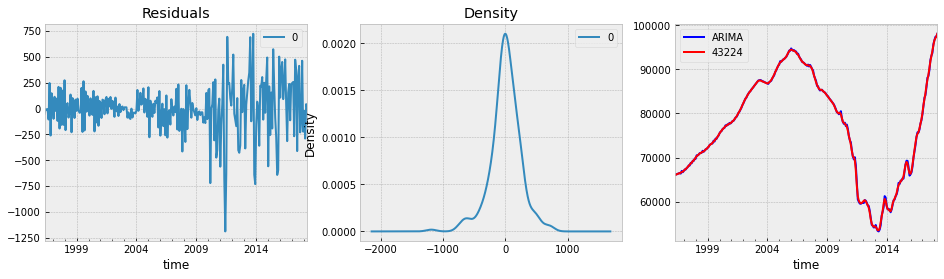

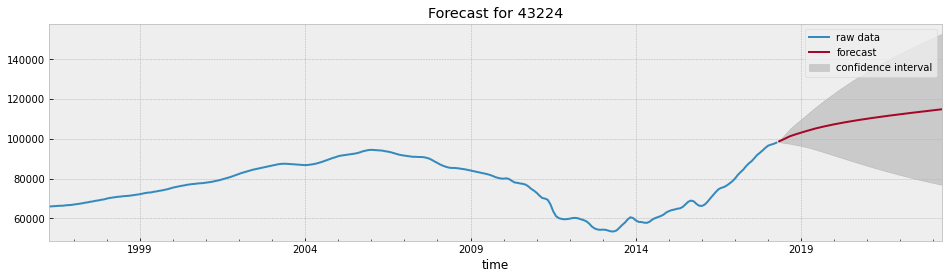

Forecast Period: 05/01/2018 to 04/01/2023, 60 months


43224
city, state          Columbus, OH
initial investment        $22,838
prediction                 17.09%
best case scenario          55.8%
worst case scenario       -21.61%

----------Zipcode 43224: end ----------

----------Zipcode 29605: begin ----------


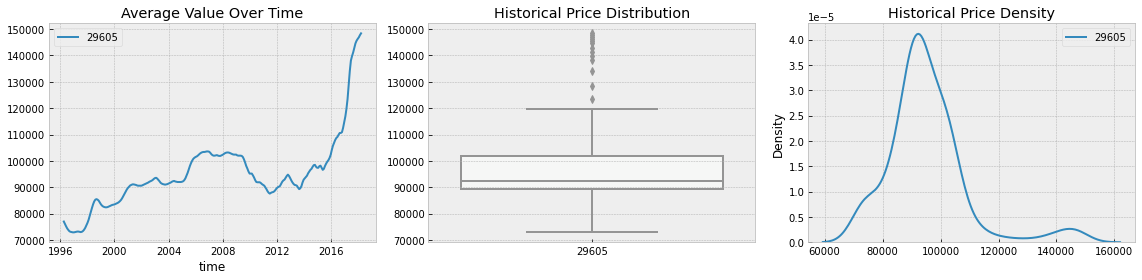

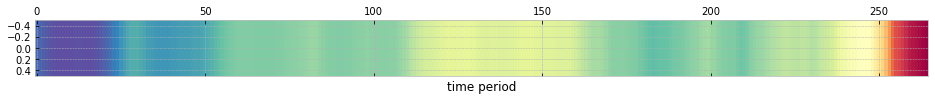

29605
time                
1996-04-01   77000.0
1996-05-01   76100.0
1996-06-01   75200.0
1996-07-01   74400.0
1996-08-01   73800.0
...              ...
2017-12-01  145600.0
2018-01-01  146300.0
2018-02-01  146900.0
2018-03-01  147700.0
2018-04-01  148400.0

[265 rows x 1 columns]

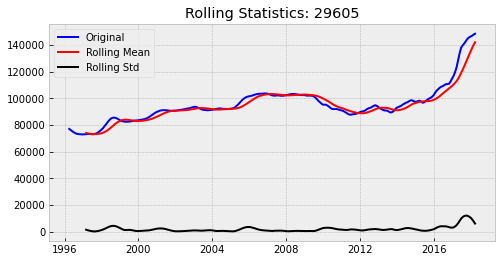

Results of Dickey-Fuller Test for 29605: 

Test Statistic                  -0.046757
p-value                          0.954490
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64



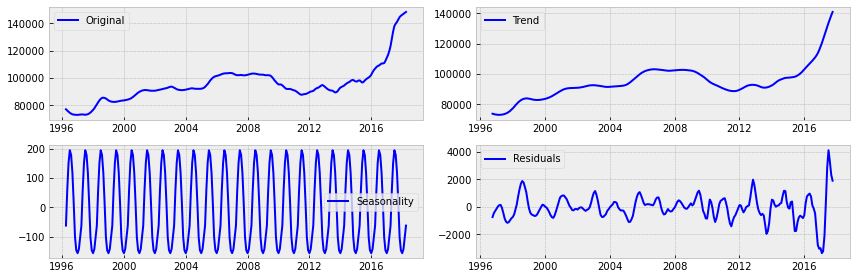

evaluating best ARIMA parameters...

time elapsed: 0.1 mins. 	 combination: 5 of 63
time elapsed: 0.28 mins. 	 combination: 10 of 63
time elapsed: 0.62 mins. 	 combination: 15 of 63
time elapsed: 1.13 mins. 	 combination: 20 of 63
time elapsed: 1.74 mins. 	 combination: 25 of 63
time elapsed: 2.23 mins. 	 combination: 30 of 63
time elapsed: 3.16 mins. 	 combination: 35 of 63
time elapsed: 4.72 mins. 	 combination: 40 of 63
time elapsed: 6.76 mins. 	 combination: 45 of 63
time elapsed: 16.06 mins. 	 combination: 50 of 63
time elapsed: 21.56 mins. 	 combination: 55 of 63
time elapsed: 31.6 mins. 	 combination: 60 of 63

 Best ARIMA(10, 2, 2) MSE=177322.200 

                             ARIMA Model Results                              
Dep. Variable:               D2.29605   No. Observations:                  263
Model:                ARIMA(10, 2, 2)   Log Likelihood               -1828.924
Method:                       css-mle   S.D. of innovations            252.078
Date:              

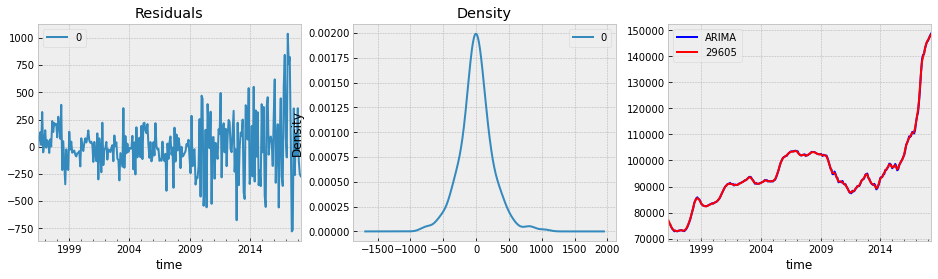

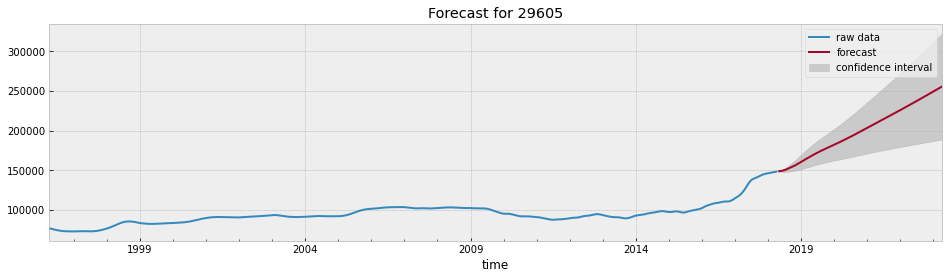

Forecast Period: 05/01/2018 to 04/01/2023, 60 months


29605
city, state          Greenville, SC
initial investment          $34,548
prediction                   72.19%
best case scenario          117.19%
worst case scenario          27.19%

----------Zipcode 29605: end ----------

----------Zipcode 43213: begin ----------


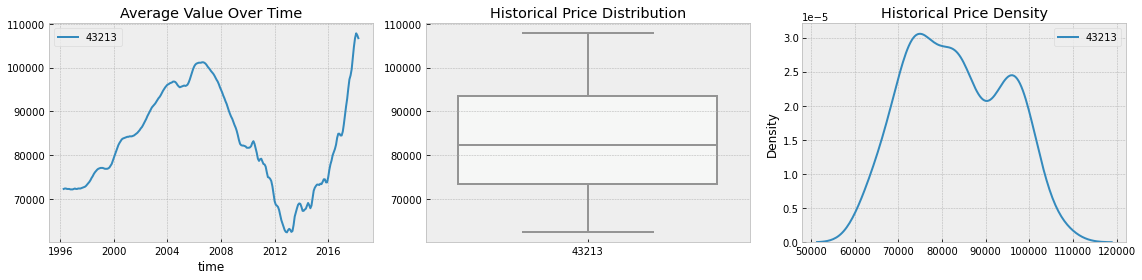

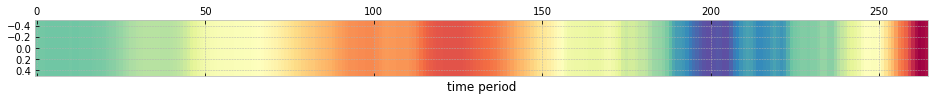

43213
time                
1996-04-01   72300.0
1996-05-01   72400.0
1996-06-01   72400.0
1996-07-01   72300.0
1996-08-01   72300.0
...              ...
2017-12-01  104700.0
2018-01-01  106700.0
2018-02-01  107800.0
2018-03-01  107400.0
2018-04-01  106700.0

[265 rows x 1 columns]

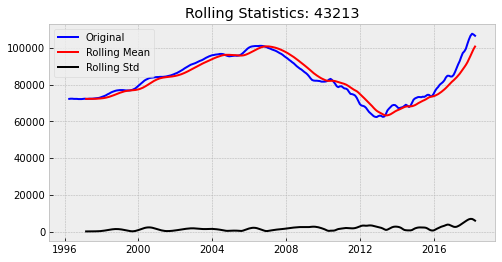

Results of Dickey-Fuller Test for 43213: 

Test Statistic                  -2.588025
p-value                          0.095498
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64



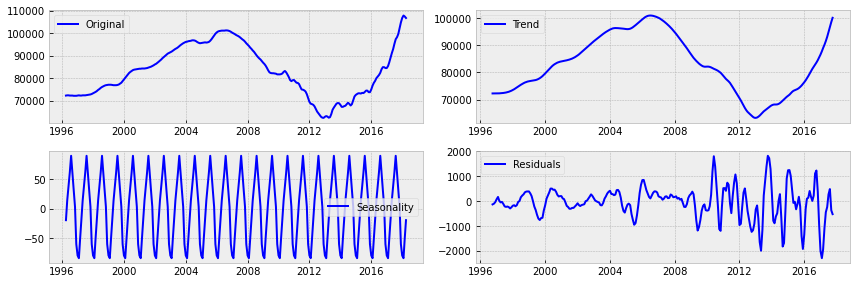

evaluating best ARIMA parameters...

time elapsed: 0.01 mins. 	 combination: 5 of 63
time elapsed: 0.2 mins. 	 combination: 10 of 63
time elapsed: 0.49 mins. 	 combination: 15 of 63
time elapsed: 0.85 mins. 	 combination: 20 of 63
time elapsed: 1.5 mins. 	 combination: 25 of 63
time elapsed: 2.39 mins. 	 combination: 30 of 63
time elapsed: 3.71 mins. 	 combination: 35 of 63
time elapsed: 4.94 mins. 	 combination: 40 of 63
time elapsed: 7.05 mins. 	 combination: 45 of 63
time elapsed: 15.15 mins. 	 combination: 50 of 63
time elapsed: 20.93 mins. 	 combination: 55 of 63
time elapsed: 29.49 mins. 	 combination: 60 of 63

 Best ARIMA(6, 1, 0) MSE=248466.468 

                             ARIMA Model Results                              
Dep. Variable:                D.43213   No. Observations:                  264
Model:                 ARIMA(6, 1, 0)   Log Likelihood               -1878.769
Method:                       css-mle   S.D. of innovations            296.790
Date:               

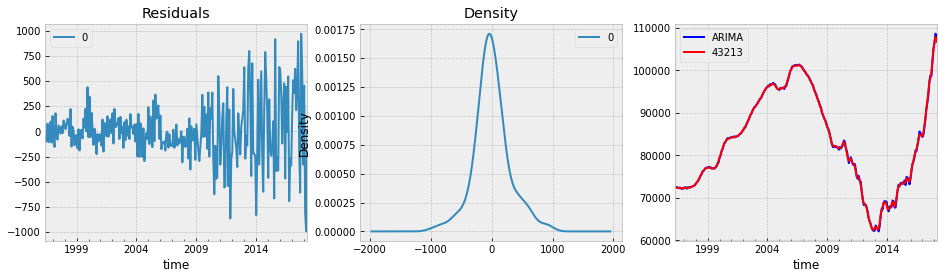

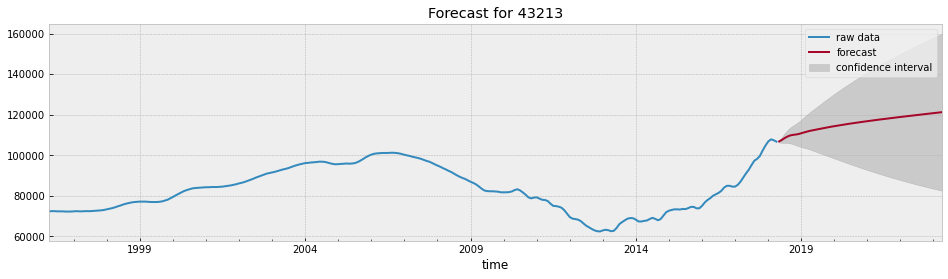

Forecast Period: 05/01/2018 to 04/01/2023, 60 months


43213
city, state          Whitehall, OH
initial investment         $24,840
prediction                   13.6%
best case scenario          49.87%
worst case scenario        -22.67%

----------Zipcode 43213: end ----------

----------Zipcode 29607: begin ----------


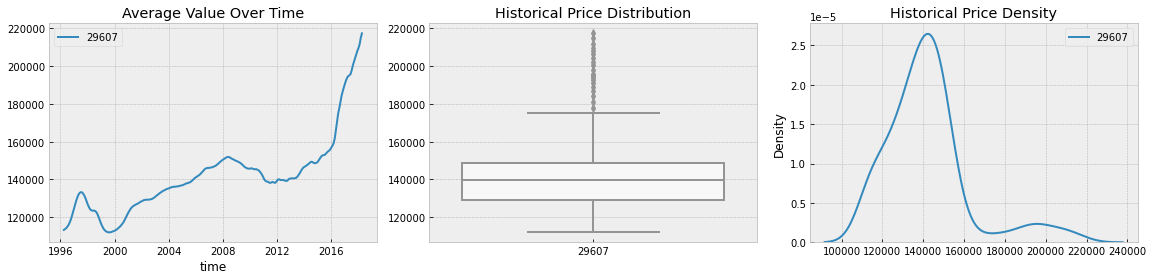

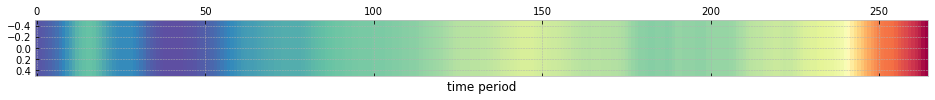

29607
time                
1996-04-01  113300.0
1996-05-01  113700.0
1996-06-01  114200.0
1996-07-01  114900.0
1996-08-01  115800.0
...              ...
2017-12-01  208200.0
2018-01-01  209700.0
2018-02-01  211800.0
2018-03-01  215000.0
2018-04-01  217400.0

[265 rows x 1 columns]

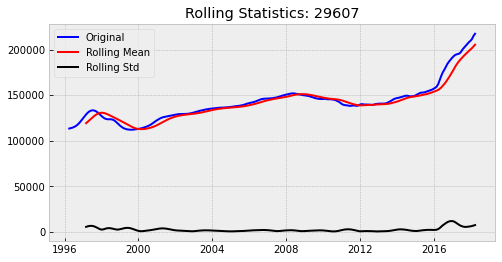

Results of Dickey-Fuller Test for 29607: 

Test Statistic                   1.106092
p-value                          0.995268
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64



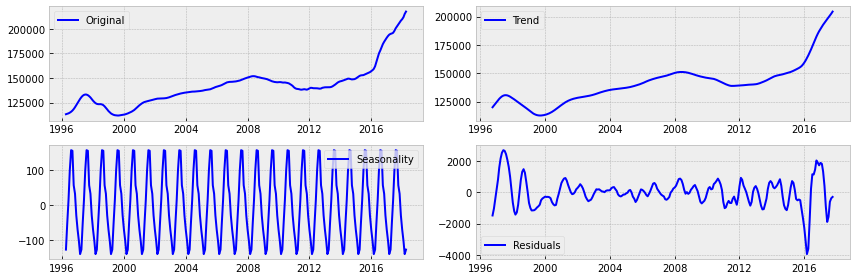

evaluating best ARIMA parameters...

time elapsed: 0.1 mins. 	 combination: 5 of 63
time elapsed: 0.29 mins. 	 combination: 10 of 63
time elapsed: 0.6 mins. 	 combination: 15 of 63
time elapsed: 1.06 mins. 	 combination: 20 of 63
time elapsed: 1.69 mins. 	 combination: 25 of 63
time elapsed: 2.21 mins. 	 combination: 30 of 63
time elapsed: 3.17 mins. 	 combination: 35 of 63
time elapsed: 6.81 mins. 	 combination: 40 of 63
time elapsed: 9.1 mins. 	 combination: 45 of 63
time elapsed: 19.05 mins. 	 combination: 50 of 63
time elapsed: 25.15 mins. 	 combination: 55 of 63
time elapsed: 51.51 mins. 	 combination: 60 of 63

 Best ARIMA(1, 1, 1) MSE=147399.578 

                             ARIMA Model Results                              
Dep. Variable:                D.29607   No. Observations:                  264
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1837.340
Method:                       css-mle   S.D. of innovations            253.338
Date:                

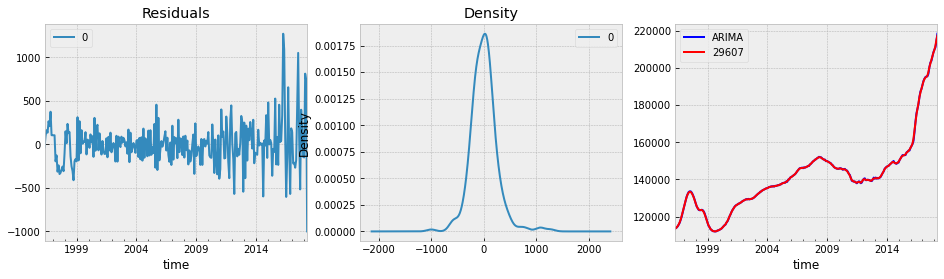

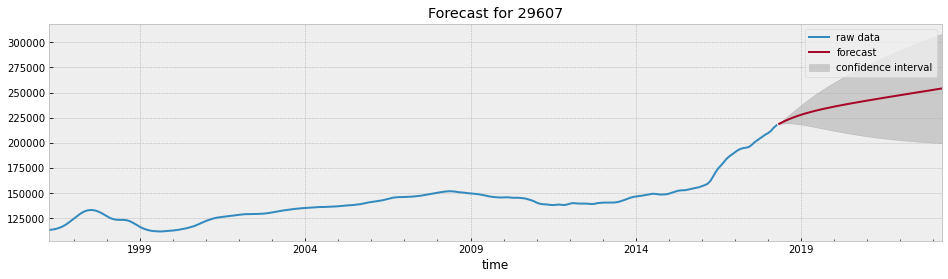

Forecast Period: 05/01/2018 to 04/01/2023, 60 months


29607
city, state          Greenville, SC
initial investment          $50,611
prediction                   16.85%
best case scenario           41.87%
worst case scenario          -8.18%

----------Zipcode 29607: end ----------

----------Zipcode 76549: begin ----------


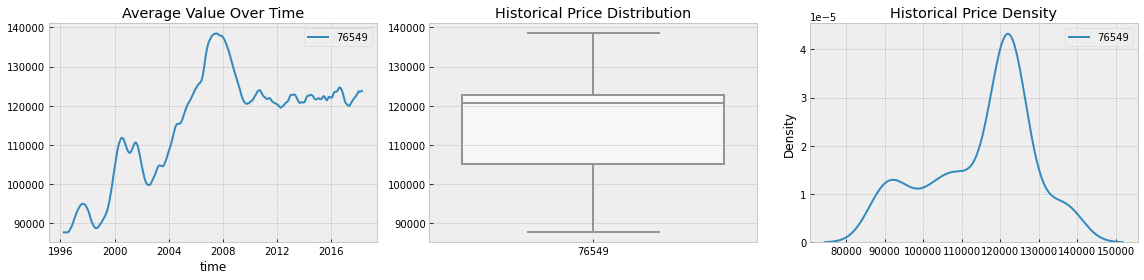

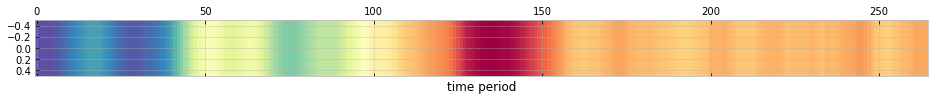

76549
time                
1996-04-01   87700.0
1996-05-01   87700.0
1996-06-01   87700.0
1996-07-01   87700.0
1996-08-01   87800.0
...              ...
2017-12-01  123100.0
2018-01-01  123700.0
2018-02-01  123600.0
2018-03-01  123700.0
2018-04-01  123800.0

[265 rows x 1 columns]

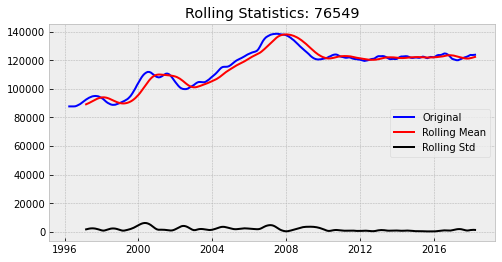

Results of Dickey-Fuller Test for 76549: 

Test Statistic                  -1.821089
p-value                          0.370043
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64



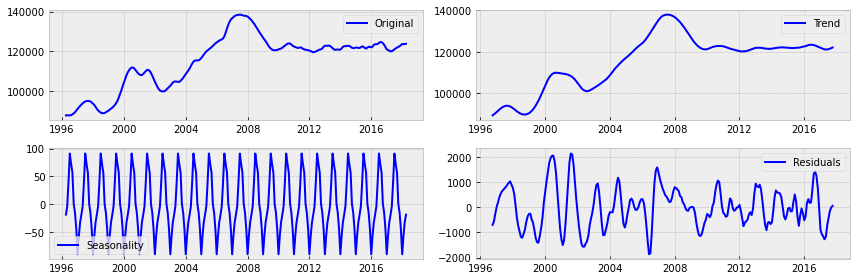

evaluating best ARIMA parameters...

time elapsed: 0.1 mins. 	 combination: 5 of 63
time elapsed: 0.3 mins. 	 combination: 10 of 63
time elapsed: 0.59 mins. 	 combination: 15 of 63
time elapsed: 1.15 mins. 	 combination: 20 of 63
time elapsed: 2.19 mins. 	 combination: 25 of 63
time elapsed: 3.63 mins. 	 combination: 30 of 63
time elapsed: 5.1 mins. 	 combination: 35 of 63
time elapsed: 8.99 mins. 	 combination: 40 of 63
time elapsed: 11.21 mins. 	 combination: 45 of 63
time elapsed: 23.63 mins. 	 combination: 50 of 63
time elapsed: 29.55 mins. 	 combination: 55 of 63
time elapsed: 57.11 mins. 	 combination: 60 of 63

 Best ARIMA(1, 1, 1) MSE=72841.501 

                             ARIMA Model Results                              
Dep. Variable:                D.76549   No. Observations:                  264
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1793.049
Method:                       css-mle   S.D. of innovations            214.449
Date:                

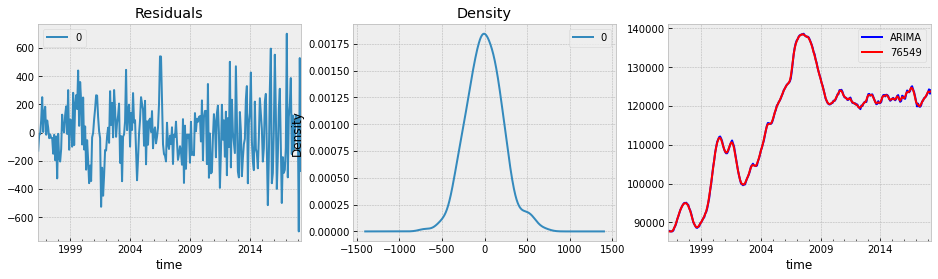

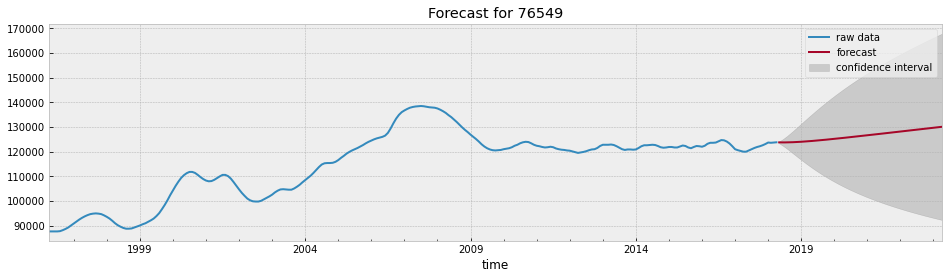

Forecast Period: 05/01/2018 to 04/01/2023, 60 months


76549
city, state          Killeen, TX
initial investment       $28,821
prediction                 5.06%
best case scenario        35.52%
worst case scenario      -25.39%

----------Zipcode 76549: end ----------

----------Zipcode 77494: begin ----------


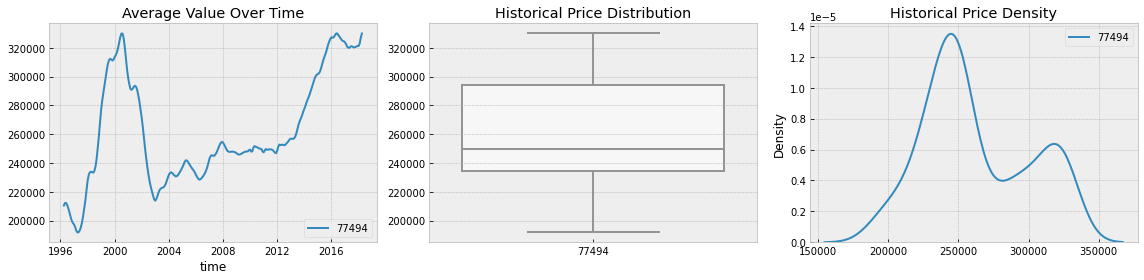

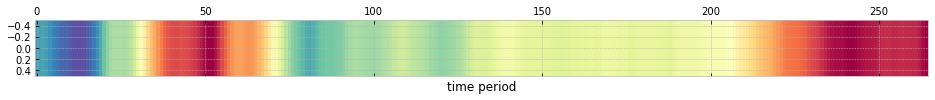

77494
time                
1996-04-01  210400.0
1996-05-01  212200.0
1996-06-01  212200.0
1996-07-01  210700.0
1996-08-01  208300.0
...              ...
2017-12-01  321200.0
2018-01-01  321200.0
2018-02-01  323000.0
2018-03-01  326900.0
2018-04-01  329900.0

[265 rows x 1 columns]

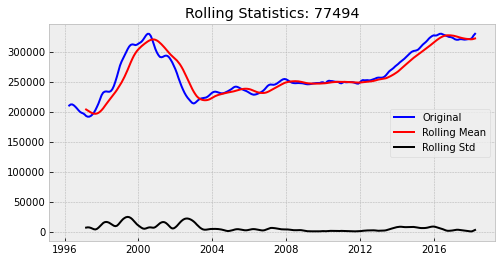

Results of Dickey-Fuller Test for 77494: 

Test Statistic                  -2.504919
p-value                          0.114282
#Lags Used                       8.000000
Number of Observations Used    256.000000
Critical Value (1%)             -3.456155
Critical Value (5%)             -2.872897
Critical Value (10%)            -2.572822
dtype: float64



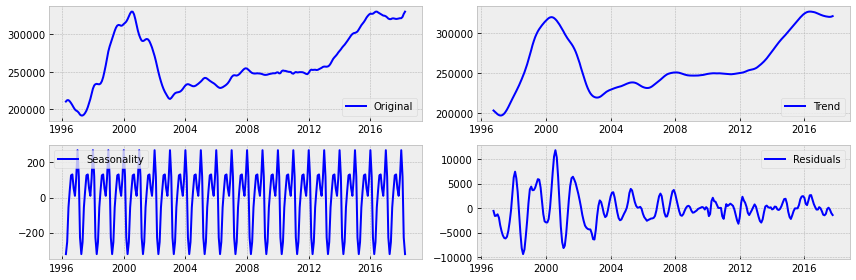

evaluating best ARIMA parameters...

time elapsed: 0.11 mins. 	 combination: 5 of 63
time elapsed: 0.36 mins. 	 combination: 10 of 63
time elapsed: 0.57 mins. 	 combination: 15 of 63
time elapsed: 1.15 mins. 	 combination: 20 of 63
time elapsed: 2.08 mins. 	 combination: 25 of 63
time elapsed: 3.35 mins. 	 combination: 30 of 63
time elapsed: 4.72 mins. 	 combination: 35 of 63
time elapsed: 7.02 mins. 	 combination: 40 of 63
time elapsed: 9.92 mins. 	 combination: 45 of 63
time elapsed: 20.02 mins. 	 combination: 50 of 63
time elapsed: 29.9 mins. 	 combination: 55 of 63
time elapsed: 39.3 mins. 	 combination: 60 of 63

 Best ARIMA(2, 1, 2) MSE=488885.320 

                             ARIMA Model Results                              
Dep. Variable:                D.77494   No. Observations:                  264
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2084.649
Method:                       css-mle   S.D. of innovations            644.915
Date:               

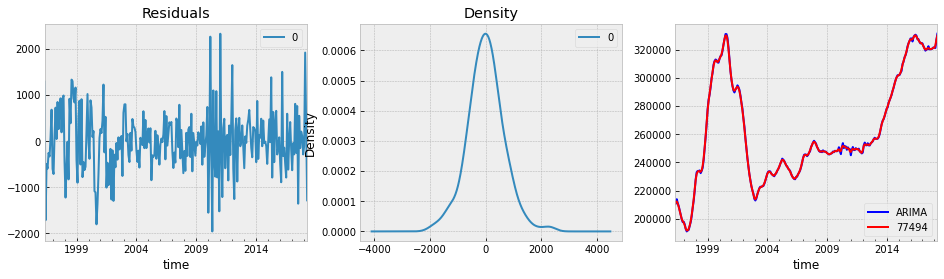

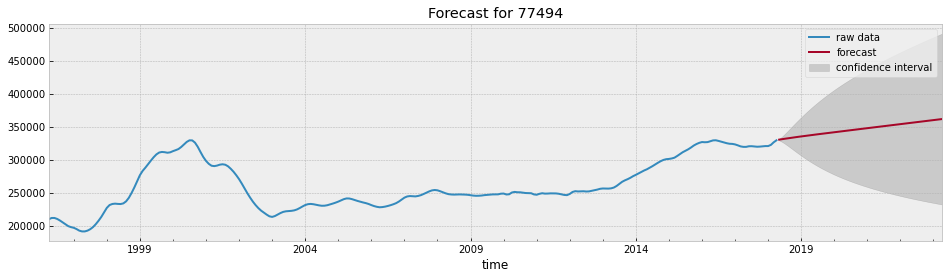

Forecast Period: 05/01/2018 to 04/01/2023, 60 months


77494
city, state          Katy, TX
initial investment    $76,801
prediction              9.76%
best case scenario     48.99%
worst case scenario   -29.46%

----------Zipcode 77494: end ----------

----------Zipcode 76542: begin ----------


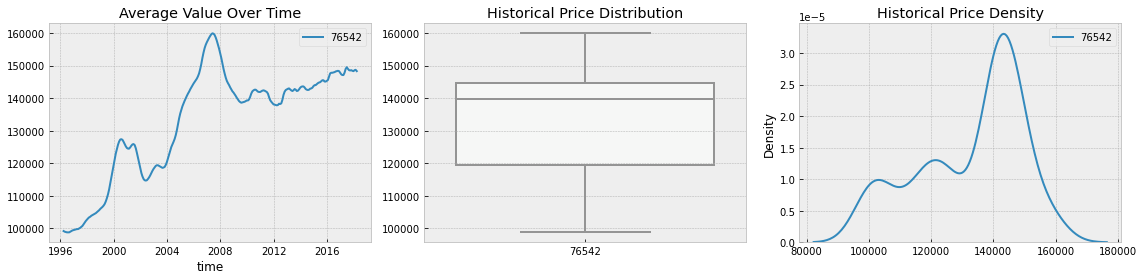

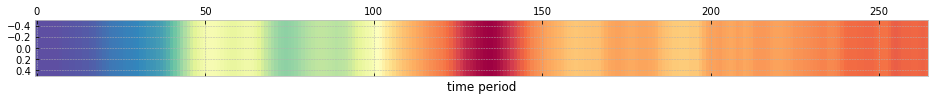

76542
time                
1996-04-01   99200.0
1996-05-01   99000.0
1996-06-01   98900.0
1996-07-01   98800.0
1996-08-01   98800.0
...              ...
2017-12-01  148400.0
2018-01-01  148300.0
2018-02-01  148600.0
2018-03-01  148700.0
2018-04-01  148300.0

[265 rows x 1 columns]

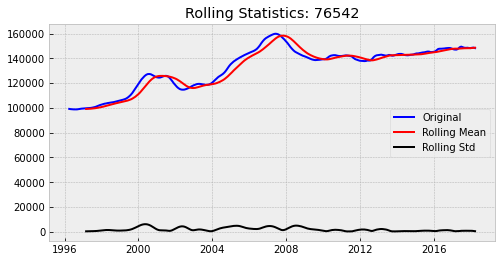

Results of Dickey-Fuller Test for 76542: 

Test Statistic                  -2.064541
p-value                          0.259010
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64



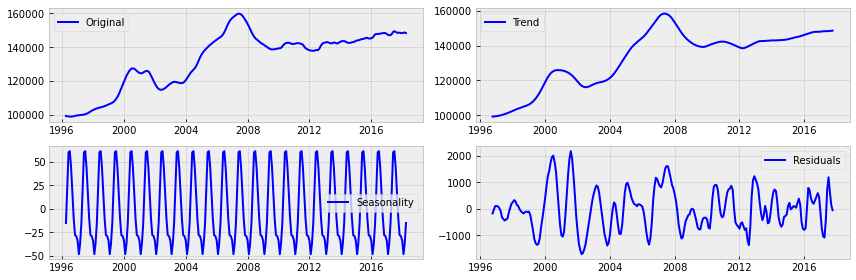

evaluating best ARIMA parameters...

time elapsed: 0.11 mins. 	 combination: 5 of 63
time elapsed: 0.31 mins. 	 combination: 10 of 63
time elapsed: 0.56 mins. 	 combination: 15 of 63
time elapsed: 1.17 mins. 	 combination: 20 of 63
time elapsed: 2.15 mins. 	 combination: 25 of 63
time elapsed: 3.49 mins. 	 combination: 30 of 63
time elapsed: 4.88 mins. 	 combination: 35 of 63
time elapsed: 8.54 mins. 	 combination: 40 of 63
time elapsed: 10.42 mins. 	 combination: 45 of 63
time elapsed: 18.79 mins. 	 combination: 50 of 63
time elapsed: 22.98 mins. 	 combination: 55 of 63
time elapsed: 43.28 mins. 	 combination: 60 of 63

 Best ARIMA(1, 1, 1) MSE=81617.256 

                             ARIMA Model Results                              
Dep. Variable:                D.76542   No. Observations:                  264
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1797.693
Method:                       css-mle   S.D. of innovations            218.216
Date:             

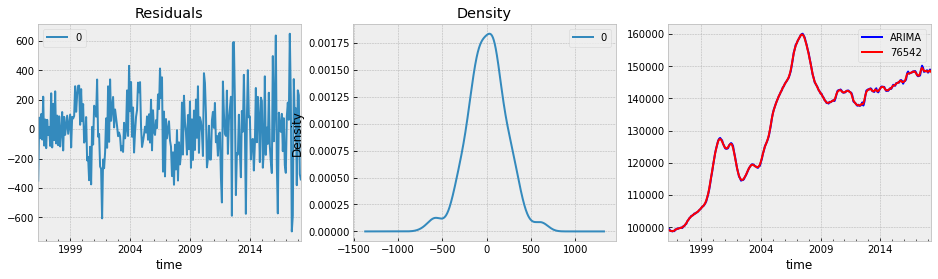

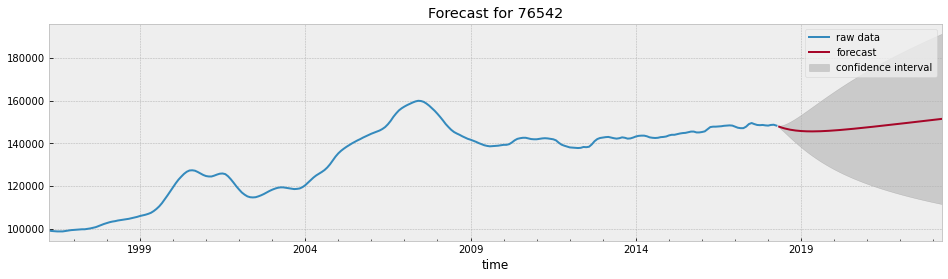

Forecast Period: 05/01/2018 to 04/01/2023, 60 months


76542
city, state          Killeen, TX
initial investment       $34,524
prediction                 2.11%
best case scenario        28.97%
worst case scenario      -24.75%

----------Zipcode 76542: end ----------

----------Zipcode 61704: begin ----------


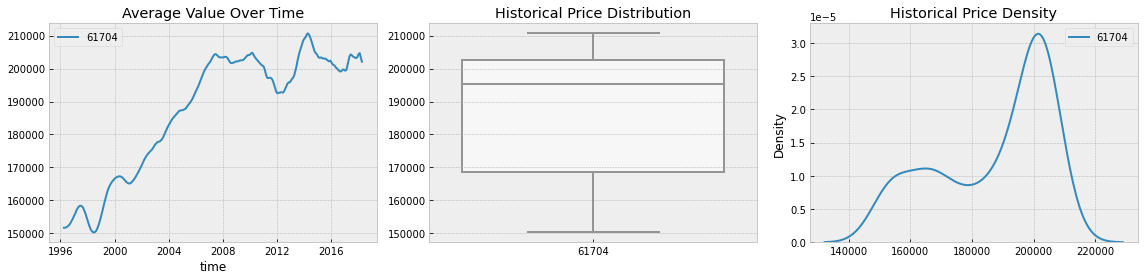

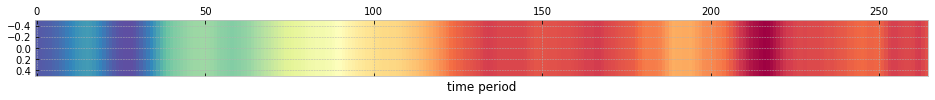

61704
time                
1996-04-01  151700.0
1996-05-01  151700.0
1996-06-01  151800.0
1996-07-01  152000.0
1996-08-01  152300.0
...              ...
2017-12-01  203500.0
2018-01-01  204400.0
2018-02-01  204700.0
2018-03-01  203400.0
2018-04-01  202100.0

[265 rows x 1 columns]

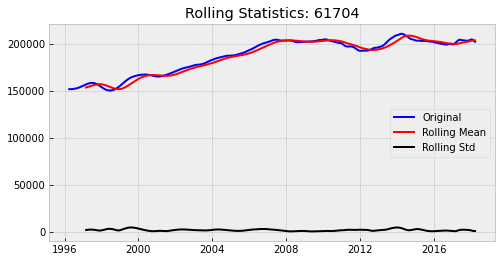

Results of Dickey-Fuller Test for 61704: 

Test Statistic                  -1.607226
p-value                          0.479963
#Lags Used                       9.000000
Number of Observations Used    255.000000
Critical Value (1%)             -3.456257
Critical Value (5%)             -2.872942
Critical Value (10%)            -2.572846
dtype: float64



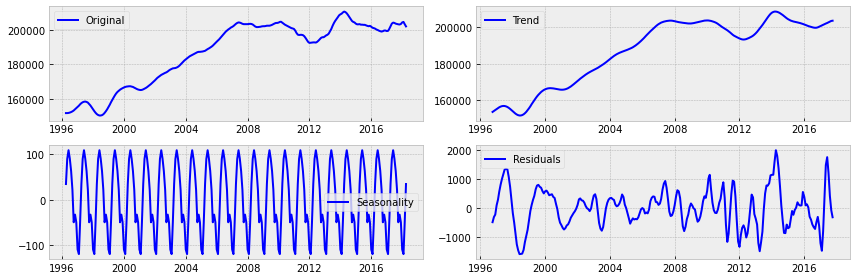

evaluating best ARIMA parameters...

time elapsed: 0.11 mins. 	 combination: 5 of 63
time elapsed: 0.28 mins. 	 combination: 10 of 63
time elapsed: 0.57 mins. 	 combination: 15 of 63
time elapsed: 0.93 mins. 	 combination: 20 of 63
time elapsed: 2.05 mins. 	 combination: 25 of 63
time elapsed: 3.25 mins. 	 combination: 30 of 63
time elapsed: 4.5 mins. 	 combination: 35 of 63
time elapsed: 8.64 mins. 	 combination: 40 of 63
time elapsed: 10.82 mins. 	 combination: 45 of 63
time elapsed: 22.94 mins. 	 combination: 50 of 63
time elapsed: 30.75 mins. 	 combination: 55 of 63
time elapsed: 54.92 mins. 	 combination: 60 of 63

 Best ARIMA(1, 1, 1) MSE=124311.097 

                             ARIMA Model Results                              
Dep. Variable:                D.61704   No. Observations:                  264
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1815.731
Method:                       css-mle   S.D. of innovations            233.861
Date:             

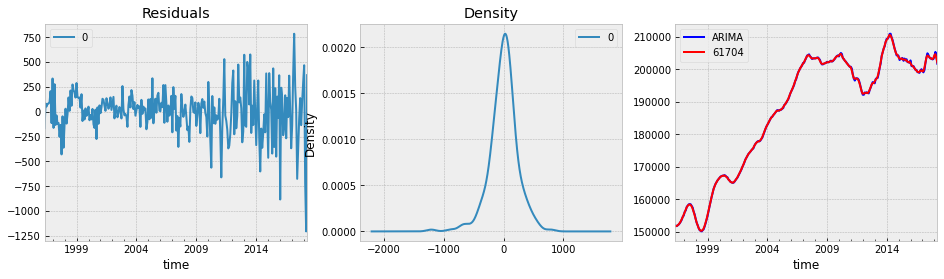

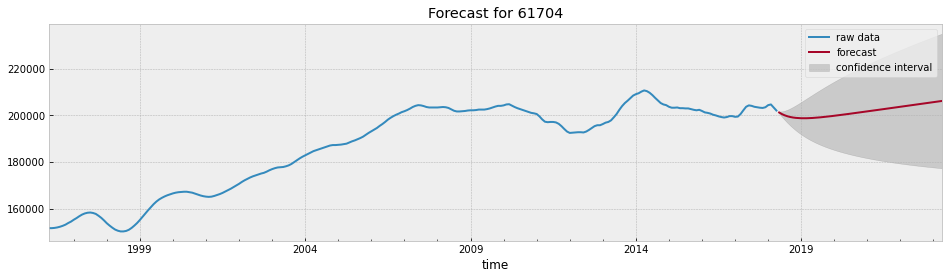

Forecast Period: 05/01/2018 to 04/01/2023, 60 months


61704
city, state          Bloomington, IL
initial investment           $47,049
prediction                     2.02%
best case scenario            16.28%
worst case scenario          -12.23%

----------Zipcode 61704: end ----------

----------Zipcode 61701: begin ----------


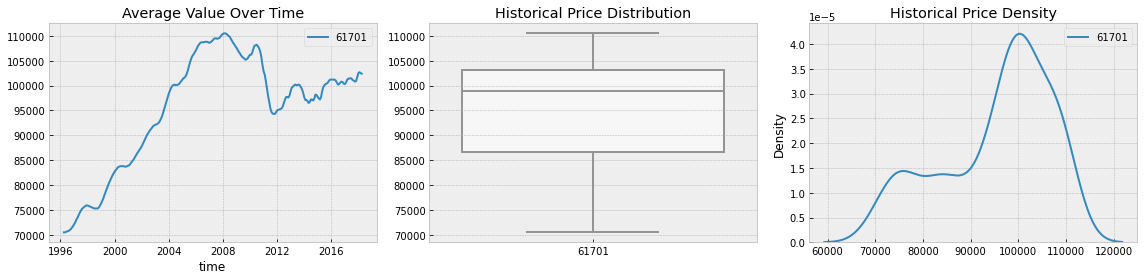

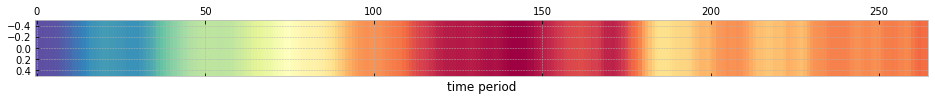

61701
time                
1996-04-01   70500.0
1996-05-01   70500.0
1996-06-01   70600.0
1996-07-01   70700.0
1996-08-01   70800.0
...              ...
2017-12-01  101700.0
2018-01-01  102500.0
2018-02-01  102700.0
2018-03-01  102500.0
2018-04-01  102400.0

[265 rows x 1 columns]

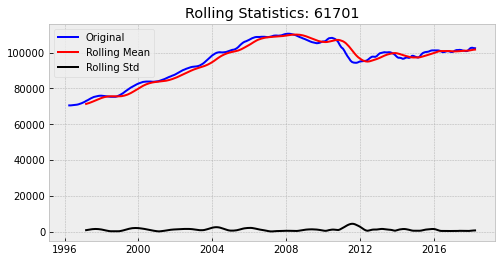

Results of Dickey-Fuller Test for 61701: 

Test Statistic                  -2.014982
p-value                          0.280043
#Lags Used                      14.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64



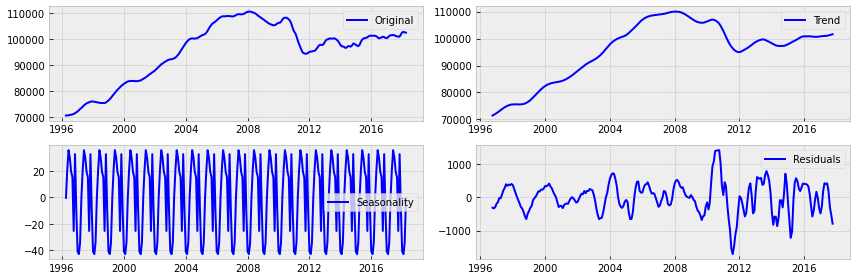

evaluating best ARIMA parameters...

time elapsed: 0.1 mins. 	 combination: 5 of 63
time elapsed: 0.28 mins. 	 combination: 10 of 63
time elapsed: 0.64 mins. 	 combination: 15 of 63
time elapsed: 1.13 mins. 	 combination: 20 of 63
time elapsed: 2.11 mins. 	 combination: 25 of 63
time elapsed: 3.57 mins. 	 combination: 30 of 63
time elapsed: 4.91 mins. 	 combination: 35 of 63
time elapsed: 10.07 mins. 	 combination: 40 of 63
time elapsed: 12.08 mins. 	 combination: 45 of 63
time elapsed: 24.03 mins. 	 combination: 50 of 63
time elapsed: 30.34 mins. 	 combination: 55 of 63
time elapsed: 64.0 mins. 	 combination: 60 of 63

 Best ARIMA(8, 0, 0) MSE=79576.740 

                              ARMA Model Results                              
Dep. Variable:                  61701   No. Observations:                  265
Model:                     ARMA(8, 0)   Log Likelihood               -1764.352
Method:                       css-mle   S.D. of innovations            184.407
Date:              

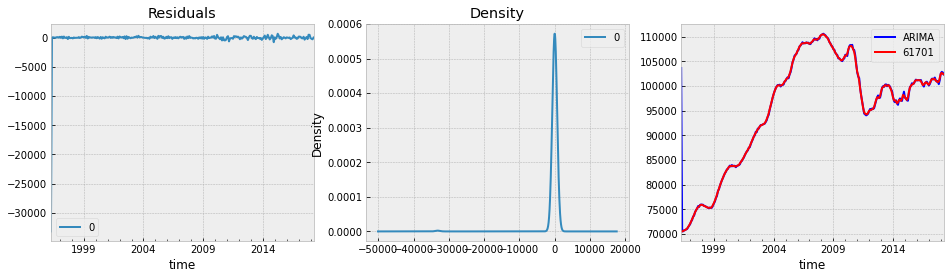

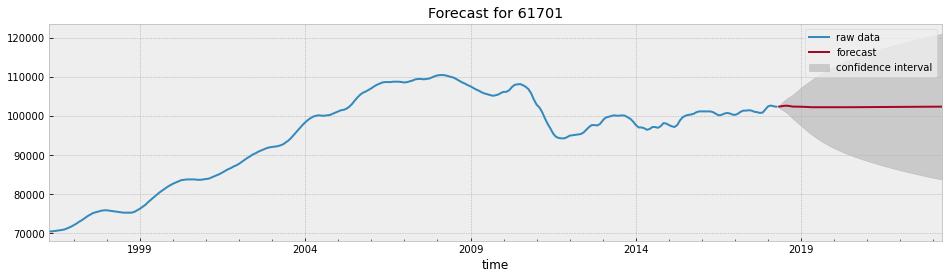

Forecast Period: 05/01/2018 to 04/01/2023, 60 months


61701
city, state          Bloomington, IL
initial investment           $23,839
prediction                     0.01%
best case scenario            18.22%
worst case scenario          -18.19%

----------Zipcode 61701: end ----------



In [36]:
# execute functions on all zipcodes in `investment_df_app` dataframe
zipcodes_app = investment_df_app.copy()
forecast_period = 60
melted_zipcode_dfs_app = []
models_app = []
prediction_dfs_app = []

# iterate through zipcodes
for index, row in zipcodes_app.iterrows():
    print(f'----------Zipcode {row["RegionName"]}: begin ----------')
    zipcode_df = zipcodes_app.copy()[index:index+1]    
    melted_df = zipcode_visuals(zipcode_df, row['RegionName'])
    display(melted_df)
    stationarity_check(melted_df, row['RegionName'])
    model = arima_results(melted_df)
    prediction_df = arima_forecast(zipcode_df, melted_df, model, forecast_period, row['RegionName'])
    display(prediction_df)
    print(f'----------Zipcode {row["RegionName"]}: end ----------\n')
        
    # store results in lists for future reference/analysis
    melted_zipcode_dfs_app.append(melted_df)
    models_app.append(model)
    prediction_dfs_app.append(prediction_df)

In [37]:
# display predictions for zipcodes sorted by appreciation
display(pd.concat(prediction_dfs_app, axis=1, join="inner"))

43207         43224           29605  \
city, state          Columbus, OH  Columbus, OH  Greenville, SC   
initial investment        $22,861       $22,838         $34,548   
prediction                 10.08%        17.09%          72.19%   
best case scenario          38.1%         55.8%         117.19%   
worst case scenario       -17.94%       -21.61%          27.19%   

                             43213           29607        76549     77494  \
city, state          Whitehall, OH  Greenville, SC  Killeen, TX  Katy, TX   
initial investment         $24,840         $50,611      $28,821   $76,801   
prediction                   13.6%          16.85%        5.06%     9.76%   
best case scenario          49.87%          41.87%       35.52%    48.99%   
worst case scenario        -22.67%          -8.18%      -25.39%   -29.46%   

                           76542            61704            61701  
city, state          Killeen, TX  Bloomington, IL  Bloomington, IL  
initial investment       $34,524          $47,049          $23,839  
prediction                 2.11%            2.02%            0.01%  
best case scenario        28.97%           16.28%           18.22%  
worst case scenario      -24.75%          -12.23%          -18.19%

### Aggregate Analysis by CV Ratio

----------Zipcode 79907: begin ----------


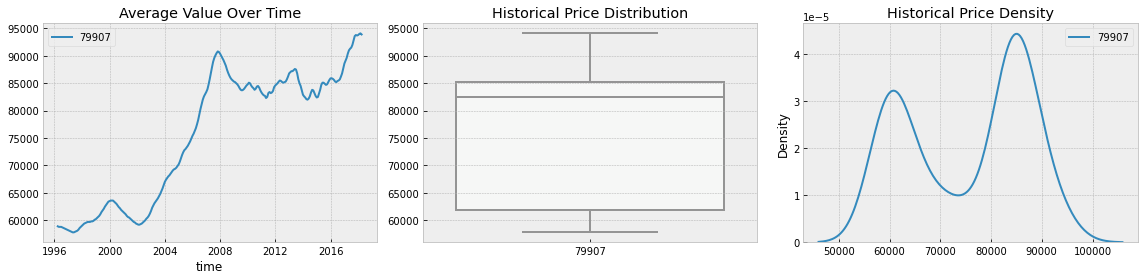

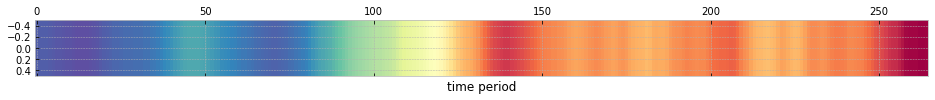

79907
time               
1996-04-01  58900.0
1996-05-01  58800.0
1996-06-01  58800.0
1996-07-01  58800.0
1996-08-01  58700.0
...             ...
2017-12-01  93700.0
2018-01-01  93800.0
2018-02-01  94000.0
2018-03-01  94100.0
2018-04-01  93900.0

[265 rows x 1 columns]

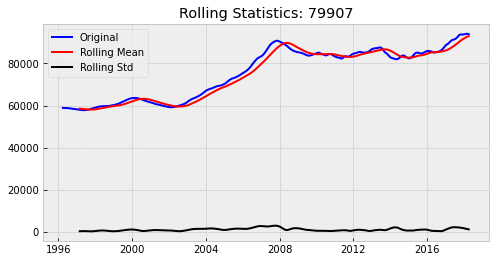

Results of Dickey-Fuller Test for 79907: 

Test Statistic                  -1.025842
p-value                          0.743723
#Lags Used                      14.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64



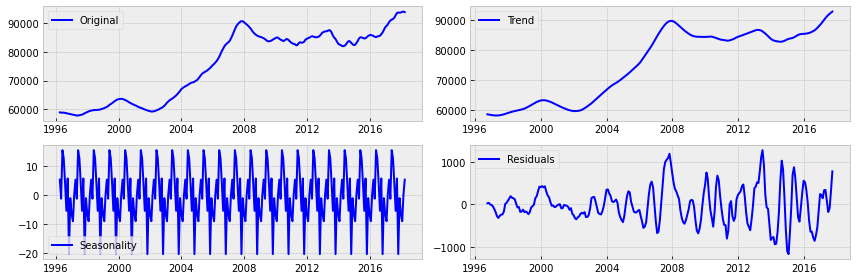

evaluating best ARIMA parameters...

time elapsed: 0.1 mins. 	 combination: 5 of 63
time elapsed: 0.27 mins. 	 combination: 10 of 63
time elapsed: 0.52 mins. 	 combination: 15 of 63
time elapsed: 1.02 mins. 	 combination: 20 of 63
time elapsed: 1.99 mins. 	 combination: 25 of 63
time elapsed: 3.31 mins. 	 combination: 30 of 63
time elapsed: 4.59 mins. 	 combination: 35 of 63
time elapsed: 7.94 mins. 	 combination: 40 of 63
time elapsed: 9.99 mins. 	 combination: 45 of 63
time elapsed: 19.41 mins. 	 combination: 50 of 63
time elapsed: 24.99 mins. 	 combination: 55 of 63
time elapsed: 48.65 mins. 	 combination: 60 of 63

 Best ARIMA(1, 1, 1) MSE=61331.057 

                             ARIMA Model Results                              
Dep. Variable:                D.79907   No. Observations:                  264
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1730.923
Method:                       css-mle   S.D. of innovations            169.732
Date:               

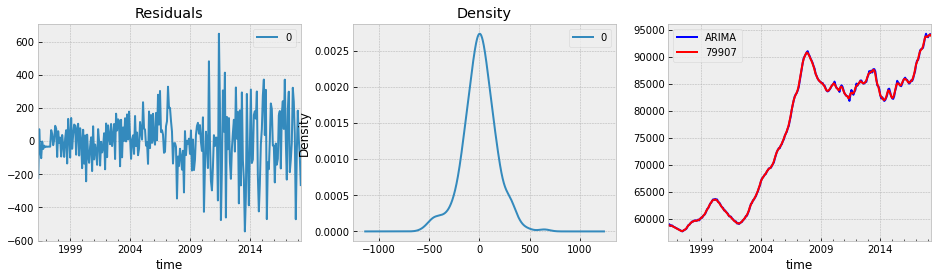

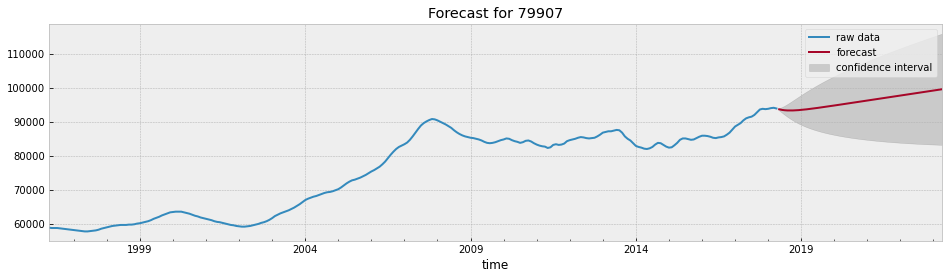

Forecast Period: 05/01/2018 to 04/01/2023, 60 months


79907
city, state          El Paso, TX
initial investment       $21,860
prediction                  6.0%
best case scenario        23.37%
worst case scenario      -11.37%

----------Zipcode 79907: end ----------

----------Zipcode 49505: begin ----------


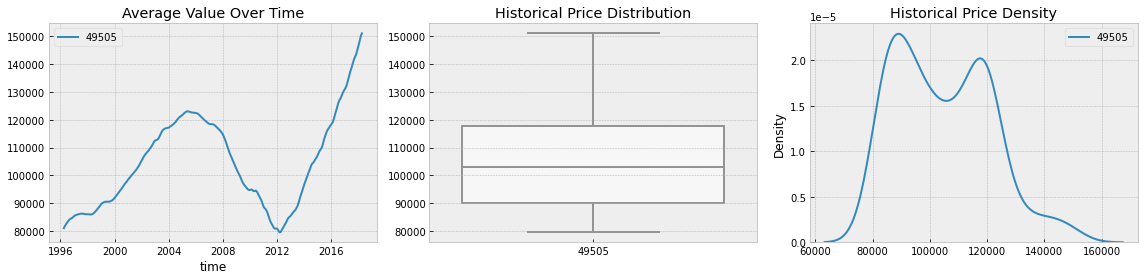

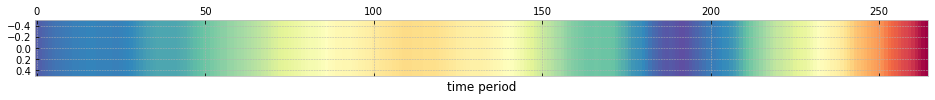

49505
time                
1996-04-01   81100.0
1996-05-01   81900.0
1996-06-01   82600.0
1996-07-01   83200.0
1996-08-01   83700.0
...              ...
2017-12-01  145100.0
2018-01-01  146600.0
2018-02-01  148300.0
2018-03-01  150000.0
2018-04-01  151000.0

[265 rows x 1 columns]

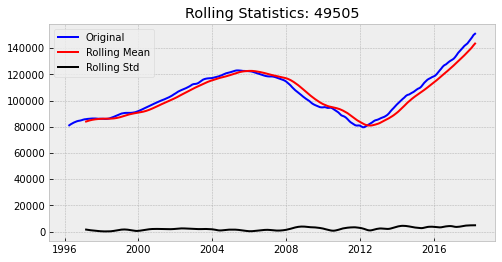

Results of Dickey-Fuller Test for 49505: 

Test Statistic                  -2.024011
p-value                          0.276146
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64



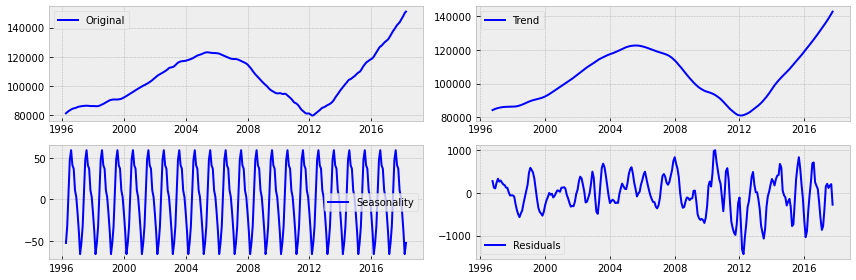

evaluating best ARIMA parameters...

time elapsed: 0.1 mins. 	 combination: 5 of 63
time elapsed: 0.29 mins. 	 combination: 10 of 63
time elapsed: 0.6 mins. 	 combination: 15 of 63
time elapsed: 1.18 mins. 	 combination: 20 of 63
time elapsed: 2.47 mins. 	 combination: 25 of 63
time elapsed: 3.71 mins. 	 combination: 30 of 63
time elapsed: 5.47 mins. 	 combination: 35 of 63
time elapsed: 8.08 mins. 	 combination: 40 of 63
time elapsed: 10.14 mins. 	 combination: 45 of 63
time elapsed: 16.88 mins. 	 combination: 50 of 63
time elapsed: 22.76 mins. 	 combination: 55 of 63
time elapsed: 42.57 mins. 	 combination: 60 of 63

 Best ARIMA(10, 2, 2) MSE=66860.168 

                             ARIMA Model Results                              
Dep. Variable:               D2.49505   No. Observations:                  263
Model:                ARIMA(10, 2, 2)   Log Likelihood               -1728.104
Method:                       css-mle   S.D. of innovations            171.895
Date:              

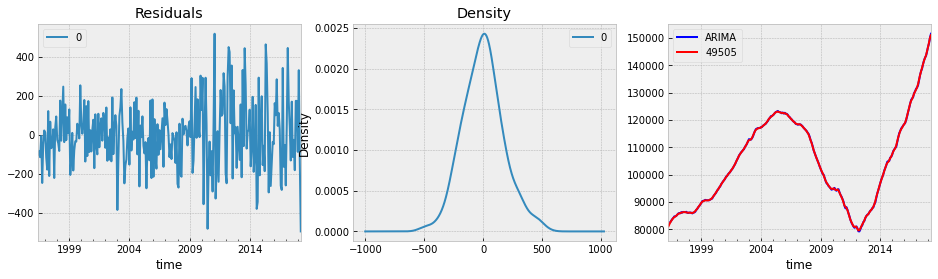

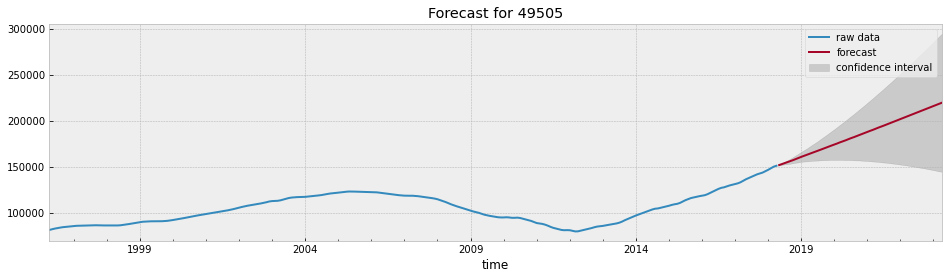

Forecast Period: 05/01/2018 to 04/01/2023, 60 months


49505
city, state          Grand Rapids, MI
initial investment            $35,153
prediction                     45.39%
best case scenario             95.11%
worst case scenario            -4.34%

----------Zipcode 49505: end ----------

----------Zipcode 30518: begin ----------


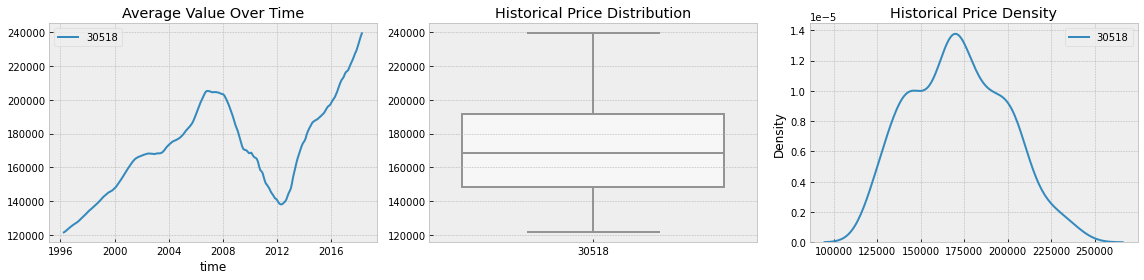

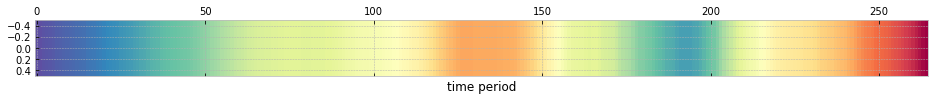

30518
time                
1996-04-01  121500.0
1996-05-01  121900.0
1996-06-01  122500.0
1996-07-01  123000.0
1996-08-01  123600.0
...              ...
2017-12-01  231000.0
2018-01-01  233300.0
2018-02-01  235500.0
2018-03-01  237600.0
2018-04-01  239400.0

[265 rows x 1 columns]

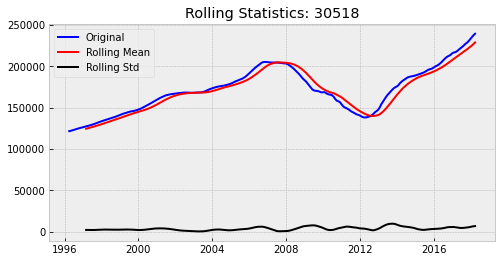

Results of Dickey-Fuller Test for 30518: 

Test Statistic                  -1.036443
p-value                          0.739741
#Lags Used                       8.000000
Number of Observations Used    256.000000
Critical Value (1%)             -3.456155
Critical Value (5%)             -2.872897
Critical Value (10%)            -2.572822
dtype: float64



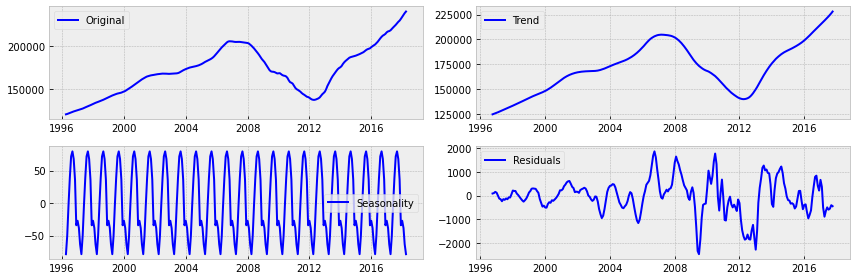

evaluating best ARIMA parameters...

time elapsed: 0.11 mins. 	 combination: 5 of 63
time elapsed: 0.31 mins. 	 combination: 10 of 63
time elapsed: 0.58 mins. 	 combination: 15 of 63
time elapsed: 1.06 mins. 	 combination: 20 of 63
time elapsed: 2.09 mins. 	 combination: 25 of 63
time elapsed: 3.51 mins. 	 combination: 30 of 63
time elapsed: 5.16 mins. 	 combination: 35 of 63
time elapsed: 9.79 mins. 	 combination: 40 of 63
time elapsed: 12.21 mins. 	 combination: 45 of 63
time elapsed: 23.25 mins. 	 combination: 50 of 63
time elapsed: 28.91 mins. 	 combination: 55 of 63
time elapsed: 53.64 mins. 	 combination: 60 of 63

 Best ARIMA(8, 0, 1) MSE=129690.108 

                              ARMA Model Results                              
Dep. Variable:                  30518   No. Observations:                  265
Model:                     ARMA(8, 1)   Log Likelihood               -1856.429
Method:                       css-mle   S.D. of innovations            259.632
Date:            

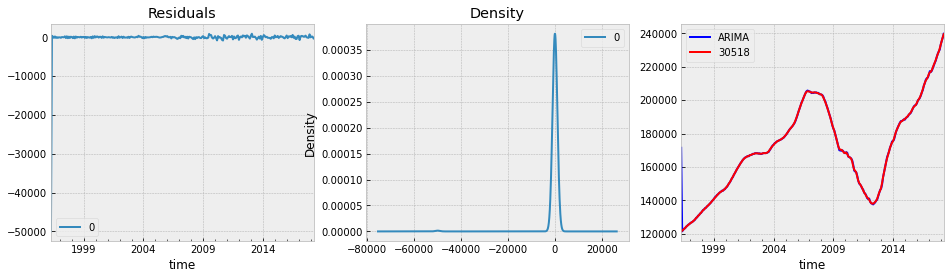

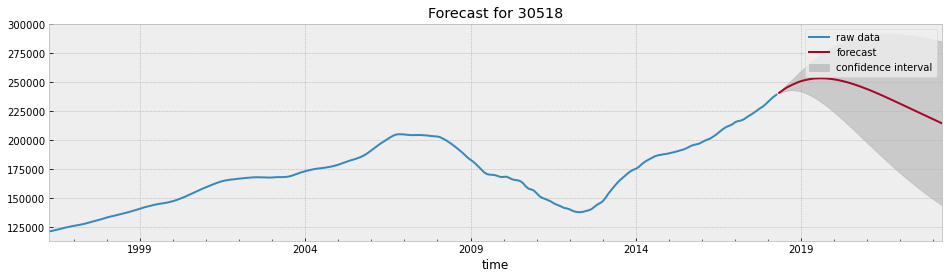

Forecast Period: 05/01/2018 to 04/01/2023, 60 months


30518
city, state          Buford, GA
initial investment      $55,732
prediction              -10.29%
best case scenario       19.23%
worst case scenario      -39.8%

----------Zipcode 30518: end ----------

----------Zipcode 48187: begin ----------


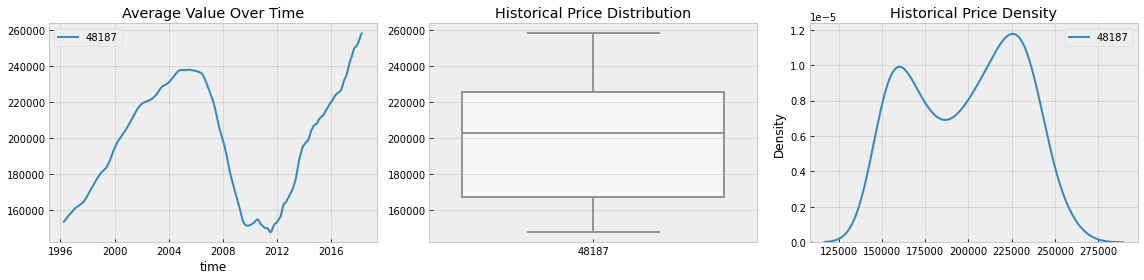

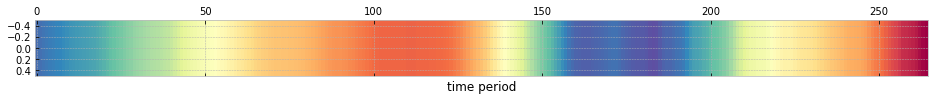

48187
time                
1996-04-01  153700.0
1996-05-01  154500.0
1996-06-01  155400.0
1996-07-01  156200.0
1996-08-01  156900.0
...              ...
2017-12-01  252000.0
2018-01-01  253400.0
2018-02-01  255200.0
2018-03-01  257200.0
2018-04-01  258200.0

[265 rows x 1 columns]

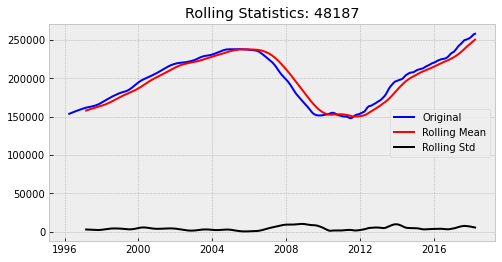

Results of Dickey-Fuller Test for 48187: 

Test Statistic                  -2.645411
p-value                          0.083970
#Lags Used                      14.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64



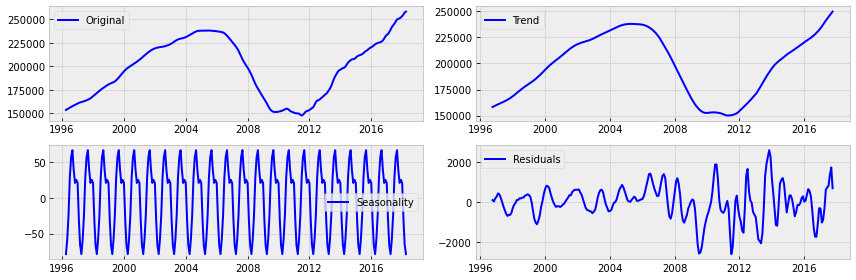

evaluating best ARIMA parameters...

time elapsed: 0.01 mins. 	 combination: 5 of 63
time elapsed: 0.21 mins. 	 combination: 10 of 63
time elapsed: 0.54 mins. 	 combination: 15 of 63
time elapsed: 1.04 mins. 	 combination: 20 of 63
time elapsed: 2.13 mins. 	 combination: 25 of 63
time elapsed: 2.99 mins. 	 combination: 30 of 63
time elapsed: 6.0 mins. 	 combination: 35 of 63
time elapsed: 8.19 mins. 	 combination: 40 of 63
time elapsed: 10.95 mins. 	 combination: 45 of 63
time elapsed: 13.17 mins. 	 combination: 50 of 63
time elapsed: 19.0 mins. 	 combination: 55 of 63
time elapsed: 23.21 mins. 	 combination: 60 of 63

 Best ARIMA(6, 1, 1) MSE=257488.673 

                             ARIMA Model Results                              
Dep. Variable:                D.48187   No. Observations:                  264
Model:                 ARIMA(6, 1, 1)   Log Likelihood               -1884.971
Method:                       css-mle   S.D. of innovations            303.049
Date:              

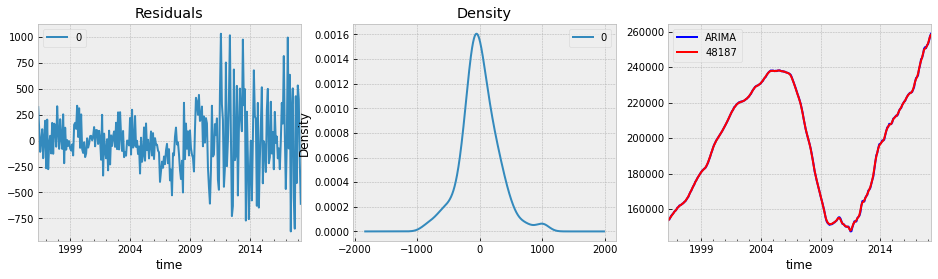

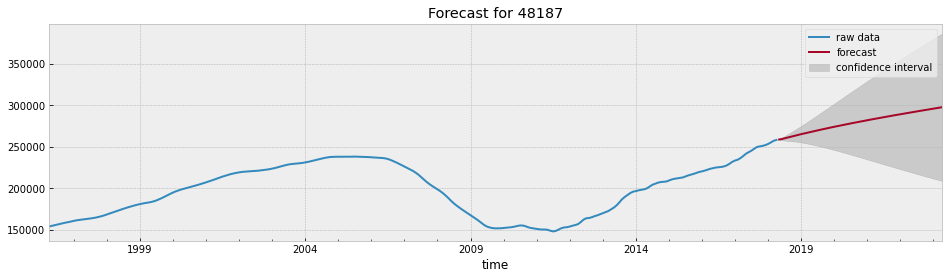

Forecast Period: 05/01/2018 to 04/01/2023, 60 months


48187
city, state          Canton, MI
initial investment      $60,109
prediction               15.27%
best case scenario       49.65%
worst case scenario     -19.11%

----------Zipcode 48187: end ----------

----------Zipcode 46383: begin ----------


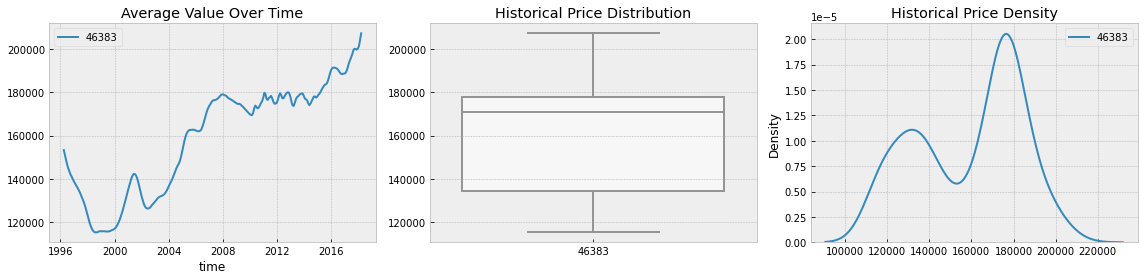

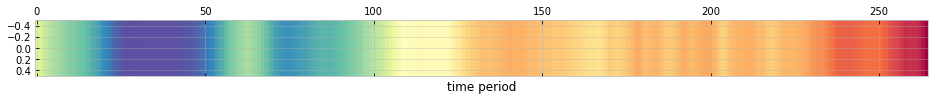

46383
time                
1996-04-01  153300.0
1996-05-01  151000.0
1996-06-01  148700.0
1996-07-01  146600.0
1996-08-01  144800.0
...              ...
2017-12-01  199600.0
2018-01-01  200100.0
2018-02-01  201300.0
2018-03-01  204200.0
2018-04-01  207100.0

[265 rows x 1 columns]

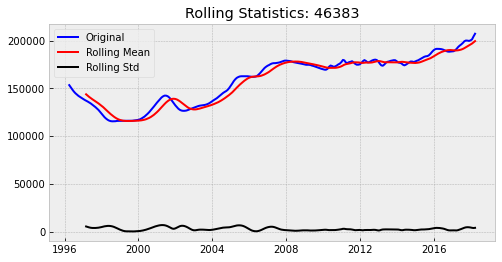

Results of Dickey-Fuller Test for 46383: 

Test Statistic                  -0.198508
p-value                          0.938699
#Lags Used                      14.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64



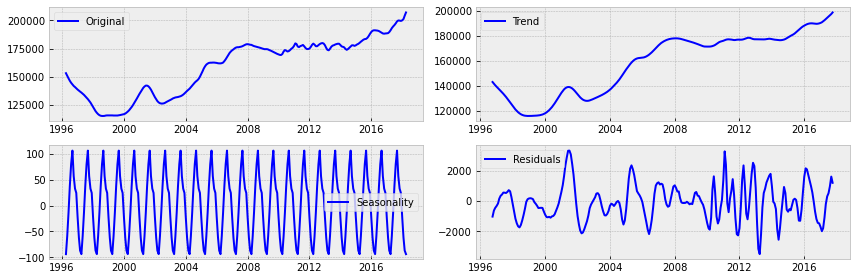

evaluating best ARIMA parameters...

time elapsed: 0.01 mins. 	 combination: 5 of 63
time elapsed: 0.24 mins. 	 combination: 10 of 63
time elapsed: 0.58 mins. 	 combination: 15 of 63
time elapsed: 1.12 mins. 	 combination: 20 of 63
time elapsed: 1.86 mins. 	 combination: 25 of 63
time elapsed: 2.54 mins. 	 combination: 30 of 63
time elapsed: 3.5 mins. 	 combination: 35 of 63
time elapsed: 7.63 mins. 	 combination: 40 of 63
time elapsed: 9.89 mins. 	 combination: 45 of 63
time elapsed: 12.8 mins. 	 combination: 50 of 63
time elapsed: 20.11 mins. 	 combination: 55 of 63
time elapsed: 27.42 mins. 	 combination: 60 of 63

 Best ARIMA(2, 1, 2) MSE=452763.015 

                             ARIMA Model Results                              
Dep. Variable:                D.46383   No. Observations:                  264
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1973.115
Method:                       css-mle   S.D. of innovations            423.514
Date:               

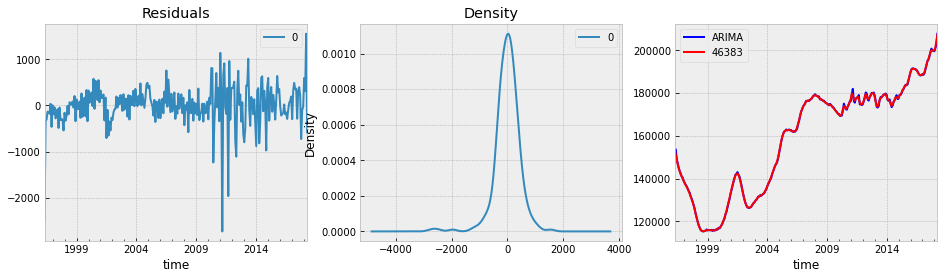

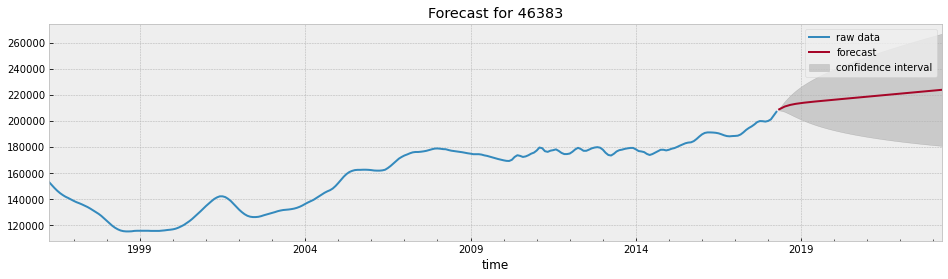

Forecast Period: 05/01/2018 to 04/01/2023, 60 months


46383
city, state          Valparaiso, IN
initial investment          $48,213
prediction                    8.14%
best case scenario            28.9%
worst case scenario         -12.62%

----------Zipcode 46383: end ----------

----------Zipcode 47802: begin ----------


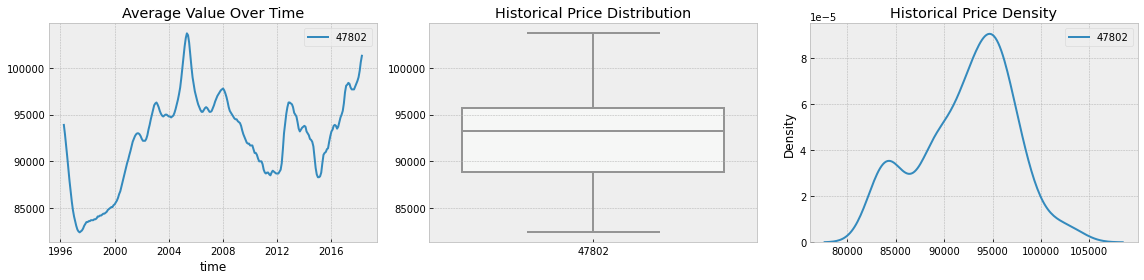

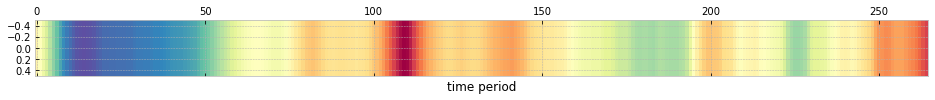

47802
time                
1996-04-01   93900.0
1996-05-01   92900.0
1996-06-01   91700.0
1996-07-01   90500.0
1996-08-01   89200.0
...              ...
2017-12-01   98600.0
2018-01-01   99000.0
2018-02-01   99700.0
2018-03-01  100600.0
2018-04-01  101300.0

[265 rows x 1 columns]

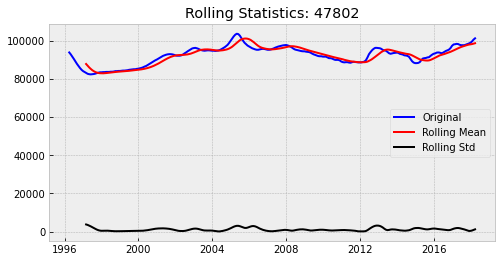

Results of Dickey-Fuller Test for 47802: 

Test Statistic                  -1.971014
p-value                          0.299425
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64



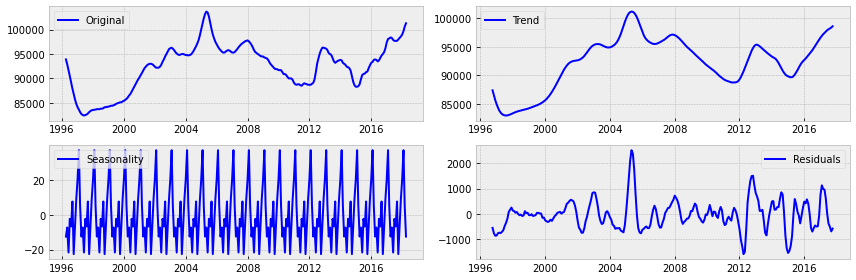

evaluating best ARIMA parameters...

time elapsed: 0.01 mins. 	 combination: 5 of 63
time elapsed: 0.19 mins. 	 combination: 10 of 63
time elapsed: 0.46 mins. 	 combination: 15 of 63
time elapsed: 0.98 mins. 	 combination: 20 of 63
time elapsed: 1.59 mins. 	 combination: 25 of 63
time elapsed: 2.34 mins. 	 combination: 30 of 63
time elapsed: 3.5 mins. 	 combination: 35 of 63
time elapsed: 4.51 mins. 	 combination: 40 of 63
time elapsed: 6.38 mins. 	 combination: 45 of 63
time elapsed: 14.33 mins. 	 combination: 50 of 63
time elapsed: 22.0 mins. 	 combination: 55 of 63
time elapsed: 31.07 mins. 	 combination: 60 of 63

 Best ARIMA(2, 0, 1) MSE=76310.080 

                              ARMA Model Results                              
Dep. Variable:                  47802   No. Observations:                  265
Model:                     ARMA(2, 1)   Log Likelihood               -1782.577
Method:                       css-mle   S.D. of innovations            198.698
Date:                

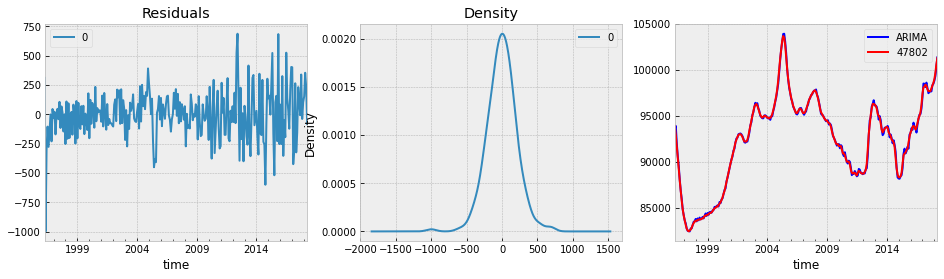

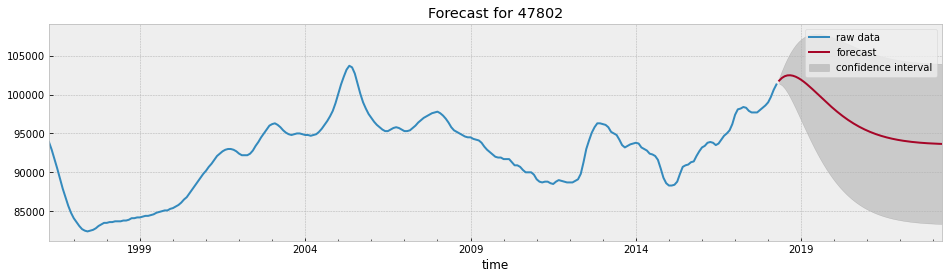

Forecast Period: 05/01/2018 to 04/01/2023, 60 months


47802
city, state          Terre Haute, IN
initial investment           $23,583
prediction                    -7.55%
best case scenario             2.61%
worst case scenario          -17.71%

----------Zipcode 47802: end ----------

----------Zipcode 46260: begin ----------


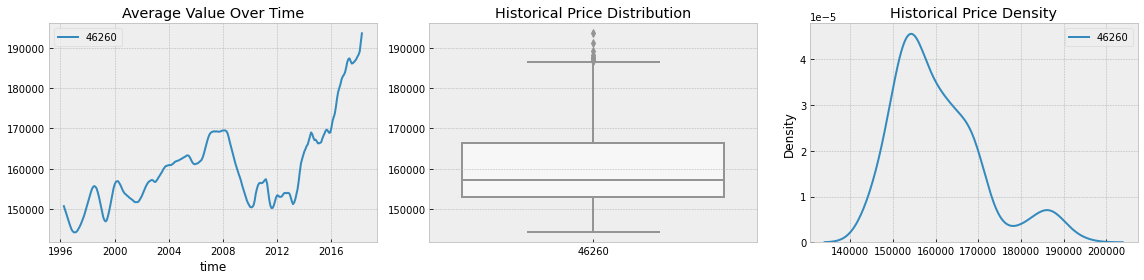

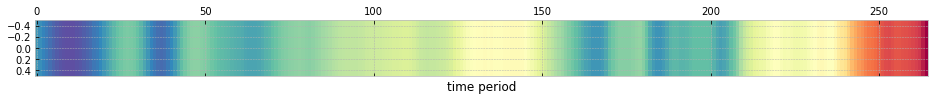

46260
time                
1996-04-01  150700.0
1996-05-01  149900.0
1996-06-01  149000.0
1996-07-01  148100.0
1996-08-01  147100.0
...              ...
2017-12-01  187800.0
2018-01-01  188300.0
2018-02-01  189100.0
2018-03-01  191200.0
2018-04-01  193600.0

[265 rows x 1 columns]

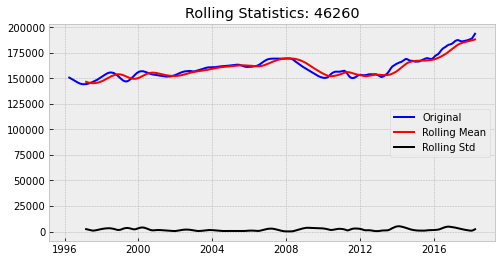

Results of Dickey-Fuller Test for 46260: 

Test Statistic                   1.367072
p-value                          0.996959
#Lags Used                      10.000000
Number of Observations Used    254.000000
Critical Value (1%)             -3.456360
Critical Value (5%)             -2.872987
Critical Value (10%)            -2.572870
dtype: float64



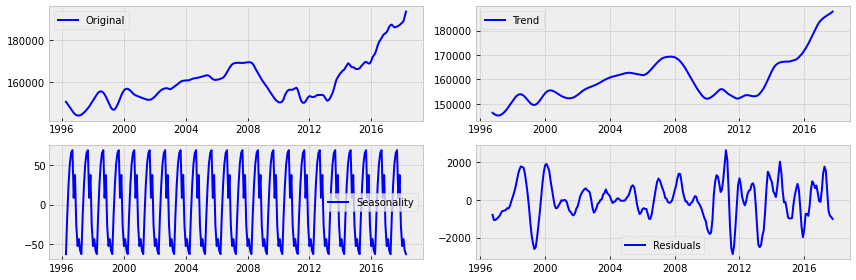

evaluating best ARIMA parameters...

time elapsed: 0.1 mins. 	 combination: 5 of 63
time elapsed: 0.28 mins. 	 combination: 10 of 63
time elapsed: 0.59 mins. 	 combination: 15 of 63
time elapsed: 0.97 mins. 	 combination: 20 of 63
time elapsed: 1.65 mins. 	 combination: 25 of 63
time elapsed: 2.32 mins. 	 combination: 30 of 63
time elapsed: 3.24 mins. 	 combination: 35 of 63
time elapsed: 4.33 mins. 	 combination: 40 of 63
time elapsed: 6.39 mins. 	 combination: 45 of 63
time elapsed: 10.49 mins. 	 combination: 50 of 63
time elapsed: 16.88 mins. 	 combination: 55 of 63
time elapsed: 26.84 mins. 	 combination: 60 of 63

 Best ARIMA(1, 1, 2) MSE=181059.304 

                             ARIMA Model Results                              
Dep. Variable:                D.46260   No. Observations:                  264
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1867.454
Method:                       css-mle   S.D. of innovations            284.314
Date:              

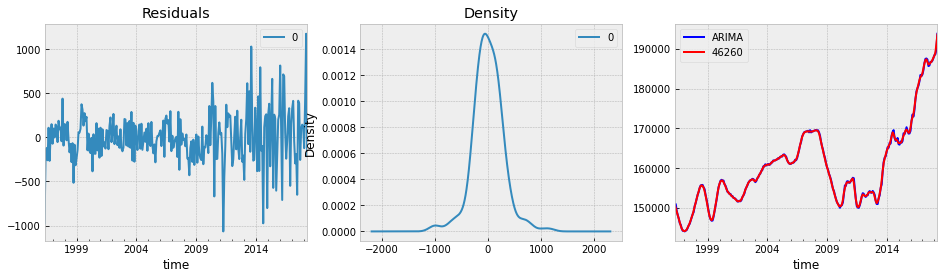

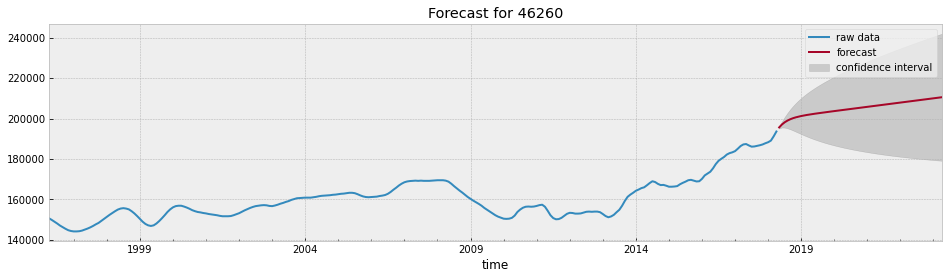

Forecast Period: 05/01/2018 to 04/01/2023, 60 months


46260
city, state          Indianapolis, IN
initial investment            $45,070
prediction                      8.74%
best case scenario             24.96%
worst case scenario            -7.47%

----------Zipcode 46260: end ----------

----------Zipcode 47715: begin ----------


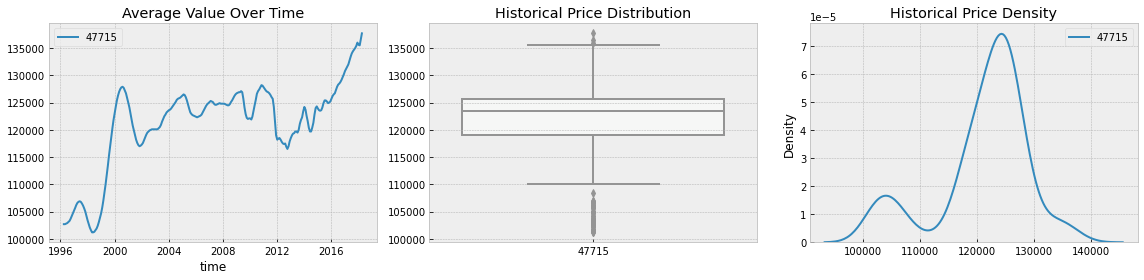

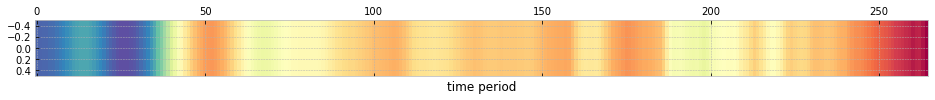

47715
time                
1996-04-01  102700.0
1996-05-01  102700.0
1996-06-01  102800.0
1996-07-01  102900.0
1996-08-01  103100.0
...              ...
2017-12-01  136000.0
2018-01-01  135600.0
2018-02-01  135500.0
2018-03-01  136500.0
2018-04-01  137700.0

[265 rows x 1 columns]

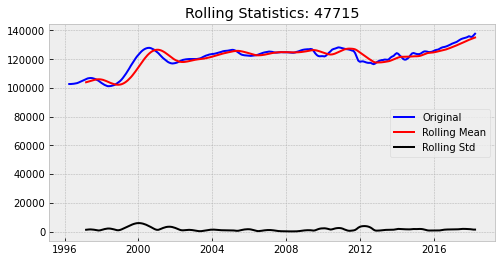

Results of Dickey-Fuller Test for 47715: 

Test Statistic                  -1.445113
p-value                          0.560468
#Lags Used                      11.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64



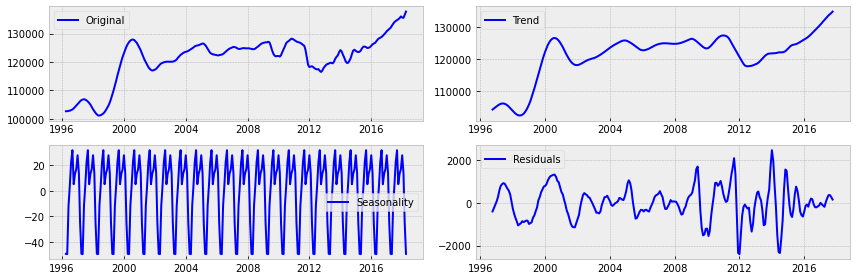

evaluating best ARIMA parameters...

time elapsed: 0.1 mins. 	 combination: 5 of 63
time elapsed: 0.28 mins. 	 combination: 10 of 63
time elapsed: 0.65 mins. 	 combination: 15 of 63
time elapsed: 1.15 mins. 	 combination: 20 of 63
time elapsed: 1.83 mins. 	 combination: 25 of 63
time elapsed: 3.13 mins. 	 combination: 30 of 63
time elapsed: 4.24 mins. 	 combination: 35 of 63
time elapsed: 7.64 mins. 	 combination: 40 of 63
time elapsed: 9.56 mins. 	 combination: 45 of 63
time elapsed: 21.86 mins. 	 combination: 50 of 63
time elapsed: 26.95 mins. 	 combination: 55 of 63
time elapsed: 51.93 mins. 	 combination: 60 of 63

 Best ARIMA(10, 1, 0) MSE=145350.115 

                             ARIMA Model Results                              
Dep. Variable:                D.47715   No. Observations:                  264
Model:                ARIMA(10, 1, 0)   Log Likelihood               -1825.934
Method:                       css-mle   S.D. of innovations            242.369
Date:             

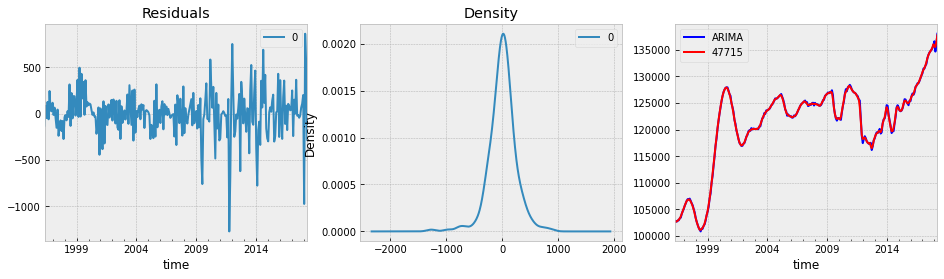

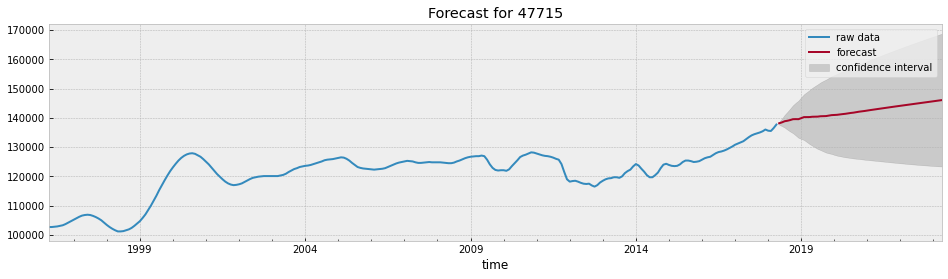

Forecast Period: 05/01/2018 to 04/01/2023, 60 months


47715
city, state          Evansville, IN
initial investment          $32,057
prediction                    6.06%
best case scenario           22.52%
worst case scenario          -10.4%

----------Zipcode 47715: end ----------

----------Zipcode 44512: begin ----------


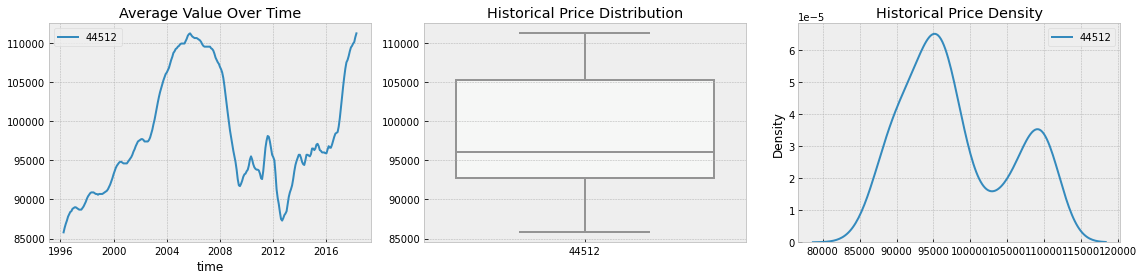

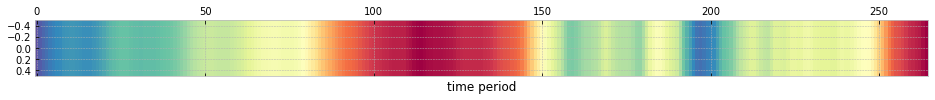

44512
time                
1996-04-01   85800.0
1996-05-01   86400.0
1996-06-01   86900.0
1996-07-01   87300.0
1996-08-01   87800.0
...              ...
2017-12-01  109600.0
2018-01-01  109900.0
2018-02-01  110100.0
2018-03-01  110700.0
2018-04-01  111200.0

[265 rows x 1 columns]

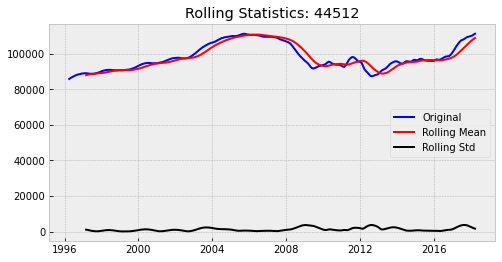

Results of Dickey-Fuller Test for 44512: 

Test Statistic                  -1.711879
p-value                          0.425002
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64



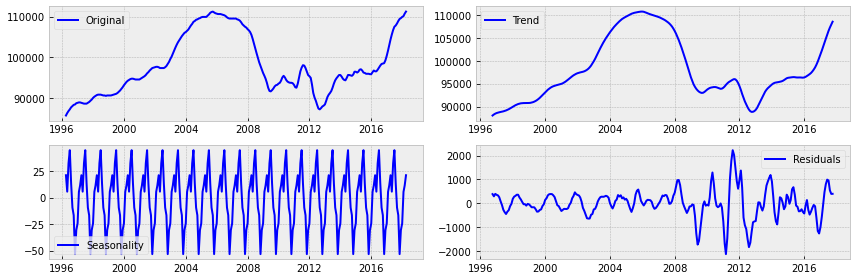

evaluating best ARIMA parameters...

time elapsed: 0.1 mins. 	 combination: 5 of 63
time elapsed: 0.28 mins. 	 combination: 10 of 63
time elapsed: 0.63 mins. 	 combination: 15 of 63
time elapsed: 1.03 mins. 	 combination: 20 of 63
time elapsed: 1.69 mins. 	 combination: 25 of 63
time elapsed: 2.96 mins. 	 combination: 30 of 63
time elapsed: 4.33 mins. 	 combination: 35 of 63
time elapsed: 8.01 mins. 	 combination: 40 of 63
time elapsed: 10.29 mins. 	 combination: 45 of 63
time elapsed: 22.81 mins. 	 combination: 50 of 63
time elapsed: 30.05 mins. 	 combination: 55 of 63
time elapsed: 55.59 mins. 	 combination: 60 of 63

 Best ARIMA(4, 0, 0) MSE=106679.566 

                              ARMA Model Results                              
Dep. Variable:                  44512   No. Observations:                  265
Model:                     ARMA(4, 0)   Log Likelihood               -1813.096
Method:                       css-mle   S.D. of innovations            222.497
Date:             

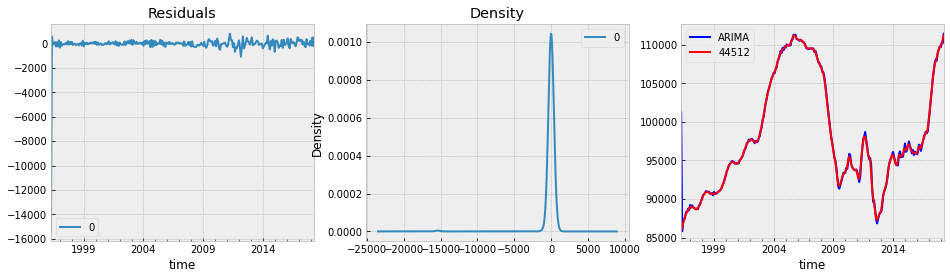

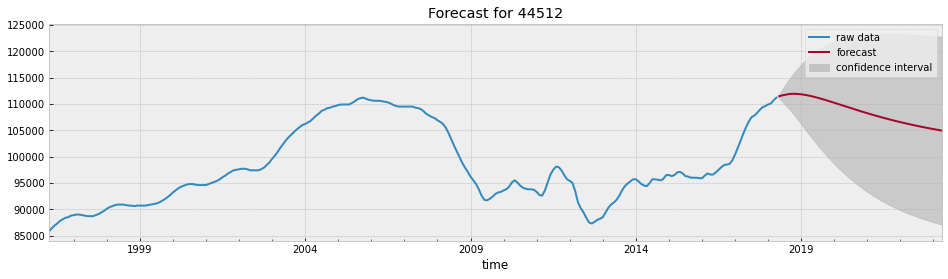

Forecast Period: 05/01/2018 to 04/01/2023, 60 months


44512
city, state          Boardman, OH
initial investment        $25,887
prediction                 -5.62%
best case scenario         10.44%
worst case scenario       -21.68%

----------Zipcode 44512: end ----------

----------Zipcode 38018: begin ----------


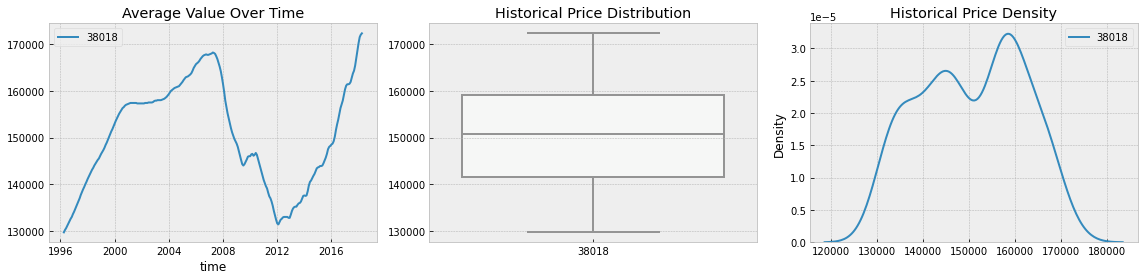

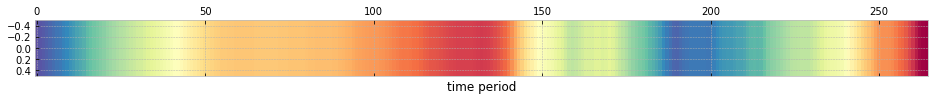

38018
time                
1996-04-01  129700.0
1996-05-01  130200.0
1996-06-01  130600.0
1996-07-01  131100.0
1996-08-01  131600.0
...              ...
2017-12-01  168600.0
2018-01-01  170200.0
2018-02-01  171500.0
2018-03-01  172000.0
2018-04-01  172300.0

[265 rows x 1 columns]

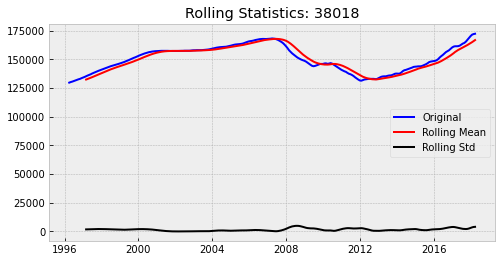

Results of Dickey-Fuller Test for 38018: 

Test Statistic                  -1.944887
p-value                          0.311248
#Lags Used                      14.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64



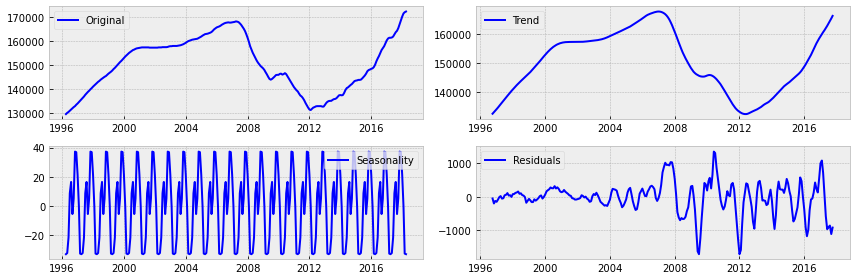

evaluating best ARIMA parameters...

time elapsed: 0.1 mins. 	 combination: 5 of 63
time elapsed: 0.29 mins. 	 combination: 10 of 63
time elapsed: 0.67 mins. 	 combination: 15 of 63
time elapsed: 1.19 mins. 	 combination: 20 of 63
time elapsed: 2.01 mins. 	 combination: 25 of 63
time elapsed: 3.17 mins. 	 combination: 30 of 63
time elapsed: 4.36 mins. 	 combination: 35 of 63
time elapsed: 8.69 mins. 	 combination: 40 of 63
time elapsed: 11.14 mins. 	 combination: 45 of 63
time elapsed: 30.76 mins. 	 combination: 50 of 63
time elapsed: 44.68 mins. 	 combination: 55 of 63
time elapsed: 79.91 mins. 	 combination: 60 of 63

 Best ARIMA(2, 1, 2) MSE=66891.219 

                             ARIMA Model Results                              
Dep. Variable:                D.38018   No. Observations:                  264
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1770.318
Method:                       css-mle   S.D. of innovations            196.785
Date:              

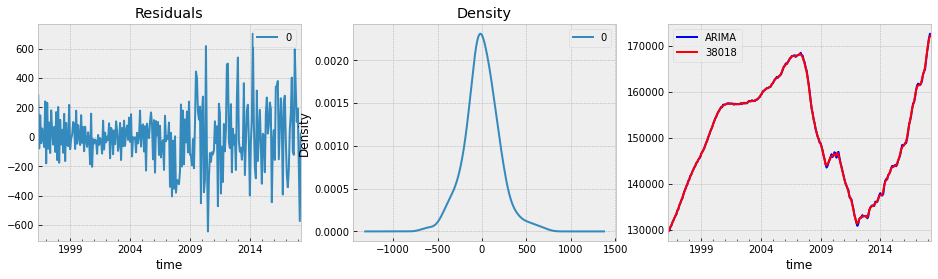

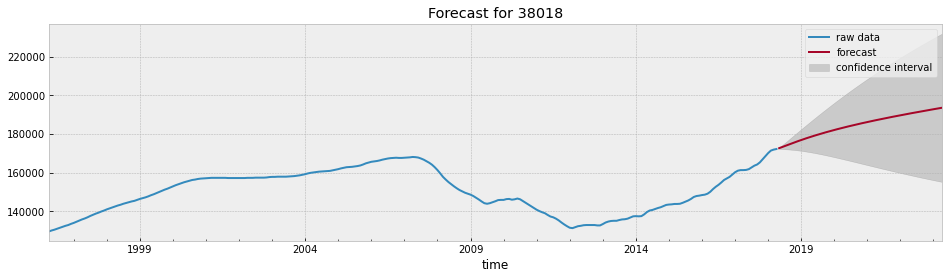

Forecast Period: 05/01/2018 to 04/01/2023, 60 months


38018
city, state          Memphis, TN
initial investment       $40,111
prediction                12.37%
best case scenario         34.6%
worst case scenario       -9.85%

----------Zipcode 38018: end ----------



In [38]:
# execute functions on zipcodes in `investment_df_cv` dataframe
zipcodes_cv = investment_df_cv.copy()
forecast_period = 60
melted_zipcode_dfs_cv = []
models_cv = []
prediction_dfs_cv = []

# iterate through zipcodes
for index, row in zipcodes_cv.iterrows():
    print(f'----------Zipcode {row["RegionName"]}: begin ----------')
    zipcode_df = zipcodes_cv.copy()[index:index+1]    
    melted_df = zipcode_visuals(zipcode_df, row['RegionName'])
    display(melted_df)
    stationarity_check(melted_df, row['RegionName'])
    model = arima_results(melted_df)
    prediction_df = arima_forecast(zipcode_df, melted_df, model, forecast_period, row['RegionName'])
    display(prediction_df)
    print(f'----------Zipcode {row["RegionName"]}: end ----------\n')
        
    # store results in lists for future reference/analysis
    melted_zipcode_dfs_cv.append(melted_df)
    models_cv.append(model)
    prediction_dfs_cv.append(prediction_df)

In [39]:
# display predictions for zipcodes sorted by CV ratio
display(pd.concat(prediction_dfs_cv, axis=1, join="inner"))

79907             49505       30518       48187  \
city, state          El Paso, TX  Grand Rapids, MI  Buford, GA  Canton, MI   
initial investment       $21,860           $35,153     $55,732     $60,109   
prediction                  6.0%            45.39%     -10.29%      15.27%   
best case scenario        23.37%            95.11%      19.23%      49.65%   
worst case scenario      -11.37%            -4.34%      -39.8%     -19.11%   

                              46383            47802             46260  \
city, state          Valparaiso, IN  Terre Haute, IN  Indianapolis, IN   
initial investment          $48,213          $23,583           $45,070   
prediction                    8.14%           -7.55%             8.74%   
best case scenario            28.9%            2.61%            24.96%   
worst case scenario         -12.62%          -17.71%            -7.47%   

                              47715         44512        38018  
city, state          Evansville, IN  Boardman, OH  Memphis, TN  
initial investment          $32,057       $25,887      $40,111  
prediction                    6.06%        -5.62%       12.37%  
best case scenario           22.52%        10.44%        34.6%  
worst case scenario          -10.4%       -21.68%       -9.85%

In [40]:
# combine the predictions of zipcodes sorted by appreciation and zipcodes sorted by CV ratio
predictions_cv = pd.concat(prediction_dfs_cv, axis=1, join="inner")
predictions_app = pd.concat(prediction_dfs_app, axis=1, join="inner")
predictions_df = pd.concat([predictions_cv, predictions_app],axis=1, join="inner")

In [41]:
# change the cell values of the predictions to integers
combined_df = predictions_df.copy()
combined_df.iloc[2] = combined_df.iloc[2].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)
combined_df.iloc[3] = combined_df.iloc[3].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)
combined_df.iloc[4] = combined_df.iloc[4].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)

### Sort by Average Prediction Value

In [42]:
# return sorted results
combined_df.sort_values(by='prediction', ascending=False, axis=1)

29605             49505         43224  \
city, state          Greenville, SC  Grand Rapids, MI  Columbus, OH   
initial investment          $34,548           $35,153       $22,838   
prediction                    72.19             45.39         17.09   
best case scenario           117.19             95.11          55.8   
worst case scenario           27.19             -4.34        -21.61   

                              29607       48187          43213        38018  \
city, state          Greenville, SC  Canton, MI  Whitehall, OH  Memphis, TN   
initial investment          $50,611     $60,109        $24,840      $40,111   
prediction                    16.85       15.27           13.6        12.37   
best case scenario            41.87       49.65          49.87         34.6   
worst case scenario           -8.18      -19.11         -22.67        -9.85   

                            43207     77494             46260           46383  \
city, state          Columbus, OH  Katy, TX  Indianapolis, IN  Valparaiso, IN   
initial investment        $22,861   $76,801           $45,070         $48,213   
prediction                  10.08      9.76              8.74            8.14   
best case scenario           38.1     48.99             24.96            28.9   
worst case scenario        -17.94    -29.46             -7.47          -12.62   

                              47715        79907        76549        76542  \
city, state          Evansville, IN  El Paso, TX  Killeen, TX  Killeen, TX   
initial investment          $32,057      $21,860      $28,821      $34,524   
prediction                     6.06            6         5.06         2.11   
best case scenario            22.52        23.37        35.52        28.97   
worst case scenario           -10.4       -11.37       -25.39       -24.75   

                               61704            61701         44512  \
city, state          Bloomington, IL  Bloomington, IL  Boardman, OH   
initial investment           $47,049          $23,839       $25,887   
prediction                      2.02             0.01         -5.62   
best case scenario             16.28            18.22         10.44   
worst case scenario           -12.23           -18.19        -21.68   

                               47802       30518  
city, state          Terre Haute, IN  Buford, GA  
initial investment           $23,583     $55,732  
prediction                     -7.55      -10.29  
best case scenario              2.61       19.23  
worst case scenario           -17.71       -39.8

### Sort by 95% confidence interval range

In [43]:
# create a new row with the calculated delta of the 95% confidence interval
combined_df.loc['delta'] = combined_df.loc['best case scenario'] - combined_df.loc['worst case scenario']

# return sorted results
combined_df.sort_values(by='delta', ascending=True, axis=1)

47802            61704         44512  \
city, state          Terre Haute, IN  Bloomington, IL  Boardman, OH   
initial investment           $23,583          $47,049       $25,887   
prediction                     -7.55             2.02         -5.62   
best case scenario              2.61            16.28         10.44   
worst case scenario           -17.71           -12.23        -21.68   
delta                          20.32            28.51         32.12   

                                46260           47715        79907  \
city, state          Indianapolis, IN  Evansville, IN  El Paso, TX   
initial investment            $45,070         $32,057      $21,860   
prediction                       8.74            6.06            6   
best case scenario              24.96           22.52        23.37   
worst case scenario             -7.47           -10.4       -11.37   
delta                           32.43           32.92        34.74   

                               61701           46383        38018  \
city, state          Bloomington, IL  Valparaiso, IN  Memphis, TN   
initial investment           $23,839         $48,213      $40,111   
prediction                      0.01            8.14        12.37   
best case scenario             18.22            28.9         34.6   
worst case scenario           -18.19          -12.62        -9.85   
delta                          36.41           41.52        44.45   

                              29607        76542         43207       30518  \
city, state          Greenville, SC  Killeen, TX  Columbus, OH  Buford, GA   
initial investment          $50,611      $34,524       $22,861     $55,732   
prediction                    16.85         2.11         10.08      -10.29   
best case scenario            41.87        28.97          38.1       19.23   
worst case scenario           -8.18       -24.75        -17.94       -39.8   
delta                         50.05        53.72         56.04       59.03   

                           76549       48187          43213         43224  \
city, state          Killeen, TX  Canton, MI  Whitehall, OH  Columbus, OH   
initial investment       $28,821     $60,109        $24,840       $22,838   
prediction                  5.06       15.27           13.6         17.09   
best case scenario         35.52       49.65          49.87          55.8   
worst case scenario       -25.39      -19.11         -22.67        -21.61   
delta                      60.91       68.76          72.54         77.41   

                        77494           29605             49505  
city, state          Katy, TX  Greenville, SC  Grand Rapids, MI  
initial investment    $76,801         $34,548           $35,153  
prediction               9.76           72.19             45.39  
best case scenario      48.99          117.19             95.11  
worst case scenario    -29.46           27.19             -4.34  
delta                   78.45              90             99.45

> **Observations:** When sorted by average prediction value, the 5 highest zipcodes are 29605, 49505, 43224, 29607, 48187. However, when sorted by the range of the 95% confidence interval, these same zipcodes appear on the higher end of the spectrum. In other words, the standard deviation is higher for these predictions and further analysis is warranted whether these high predictions are possible.

### Conclusion

In [44]:
# 5 recommendend zipcodes to invest
recommendations = predictions_df[['29605','49505', '29607', '38018','46260']]
display(recommendations)

# calculate initial potential investment costs
recommendations.iloc[1] = recommendations.iloc[1].apply(lambda x: np.nan if x in ['-'] else x[1:].replace(',', '')).astype(float)
print('total potential initial investment costs: ${:,.0f}\n'.format(recommendations.iloc[1].sum()))

# calculate predictions mean
predictions_mean = recommendations.iloc[2].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)
print('forecasted 5-year average return: {:,.2f}%'.format(predictions_mean.mean()))

29605             49505           29607  \
city, state          Greenville, SC  Grand Rapids, MI  Greenville, SC   
initial investment          $34,548           $35,153         $50,611   
prediction                   72.19%            45.39%          16.85%   
best case scenario          117.19%            95.11%          41.87%   
worst case scenario          27.19%            -4.34%          -8.18%   

                           38018             46260  
city, state          Memphis, TN  Indianapolis, IN  
initial investment       $40,111           $45,070  
prediction                12.37%             8.74%  
best case scenario         34.6%            24.96%  
worst case scenario       -9.85%            -7.47%

total potential initial investment costs: $205,493

forecasted 5-year average return: 31.11%


Given zipcode 29605 (Greenville, SC) has a high forecast price appreciation, albeit a large 95% confidence interval, it is worth investing in this zipcode, as the worst projected return is 27.2%.

By this same reasoning, zipcode 49505 (Grand Rapids, MI), zipcode 29607 (Greenville, SC), zipcode 38018 (Memphis, TN), and zipcode 46260 (Indianapolis, IN) are all worth investing in, as the worst projected return is within single digits.

## Additional Notes

### SARIMA Modeling (optional)

The SARIMA Model is an extension of the ARIMA Model and carrys out time series data with a seasonal component. It adds four parameters to account for the seasonal component and period of seasonality. The below code block to train a SARIMA Model was sourced from: https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/

In [ ]:
# grid search sarima hyperparameters for monthly shampoo sales dataset
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from pandas import read_csv
from pandas import datetime

# one-step sarima forecast
def sarima_forecast(history, config):
    order, sorder, trend = config
    # define model
    model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
    # fit model
    model_fit = model.fit(disp=False)
    # make one step forecast
    yhat = model_fit.predict(len(history), len(history))
    return yhat[0]

# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = sarima_forecast(history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    return error

# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
    result = None
    # convert config to a key
    key = str(cfg)
    # show all warnings and fail on exception if debugging
    if debug:
        result = walk_forward_validation(data, n_test, cfg)
    else:
        # one failure during model validation suggests an unstable config
        try:
            # never show warnings when grid searching, too noisy
            with catch_warnings():
                filterwarnings("ignore")
                result = walk_forward_validation(data, n_test, cfg)
        except:
            error = None
    # check for an interesting result
    if result is not None:
        print(' > Model[%s] %.3f' % (key, result))
    return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
    scores = None
    if parallel:
        # execute configs in parallel
        executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
        tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
        scores = executor(tasks)
    else:
        scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
    # remove empty results
    scores = [r for r in scores if r[1] != None]
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores

# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
    models = list()
    # define config lists
    p_params = [0, 1, 2]
    d_params = [0, 1]
    q_params = [0, 1, 2]
    t_params = ['n','c','t','ct']
    P_params = [0, 1, 2]
    D_params = [0, 1]
    Q_params = [0, 1, 2]
    m_params = seasonal
    # create config instances
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p,d,q), (P,D,Q,m), t]
                                    models.append(cfg)
    return models

# parse dates
def custom_parser(x):
    return datetime.strptime('195'+x, '%Y-%m')


# data split
n_test = 212
# model configs
cfg_list = sarima_configs()
# grid search
scores = grid_search(timeseries, cfg_list, n_test)
print('done')
# list top 3 configs
for cfg, error in scores[:3]:
    print(cfg, error)

### eliminating trends without ARIMA

In [ ]:
# estimate trend
for key, value in investment_zipcodes.items():
    zipcode_logScale = np.log(value)
    fig = plt.figure(figsize=(8,4))
    plt.plot(zipcode_logScale)
    plt.title(f'Analyzing Trend: {key}')
    plt.show()

# plot a rolling mean using log transformed time series, with a time window of 12
for key, value in investment_zipcodes.items():
    roll_mean = np.log(value).rolling(window=12).mean()
    fig = plt.figure(figsize=(8,4))
    plt.plot(np.log(value), color='blue', label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title(f'Rolling Mean: {key}')
    plt.show()

# Calculate rolling mean of log transformed data     
non_stationarity_df = {}
for key, value in investment_zipcodes.items():
    roll_mean = np.log(value).rolling(window=12).mean()
    data_minus_roll_mean = np.log(value) - roll_mean
    adj_data = data_minus_roll_mean.dropna(inplace=True)
    adj_df = data_minus_roll_mean
    non_stationarity_df[key] = adj_df
    display(data_minus_roll_mean.head(5))

# Calculate exponential weighted rolling mean of log transformed data
non_stationarity_df2 = {}

for key, value in investment_zipcodes.items():
    exp_roll_mean = np.log(value).ewm(halflife=12).mean()
    data_minus_exp_roll_mean = np.log(value) - exp_roll_mean
    adj_df5 = data_minus_exp_roll_mean
    non_stationarity_df2[key] = adj_df5
    fig = plt.figure(figsize=(8,4))
    plt.plot(np.log(value), color='blue',label='Original (Log Transformed)')
    plt.plot(exp_roll_mean, color='red', label='Exponentially Weighted Rolling Mean')
    plt.legend(loc='best')
    plt.show(block=False)